# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings



In [11]:
# Import the libraries you will be using for analysis
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import geopandas as gpd
import numpy as np



In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [13]:
# Try loading one file

df = pd.read_parquet(r'D:\Datasets and Dictionary\trip_records\2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [15]:
os.chdir(r'D:\Datasets and Dictionary\trip_records')

# Get all file names (make sure only .parquet files are there)
file_list = [file for file in os.listdir() if file.endswith('.parquet')]

# Final DataFrame to hold all sampled data
yearly_sampled_df = pd.DataFrame()

# Loop through each monthly file
for file_name in file_list:
    try:
        print(f"Processing {file_name}...")
        file_path = os.path.join(os.getcwd(), file_name)

        # Read the Parquet file
        df_month = pd.read_parquet(file_path)

        # Ensure datetime column is parsed
        df_month['tpep_pickup_datetime'] = pd.to_datetime(df_month['tpep_pickup_datetime'])

        # Extract date and hour
        df_month['date'] = df_month['tpep_pickup_datetime'].dt.date
        df_month['hour'] = df_month['tpep_pickup_datetime'].dt.hour

        # Store sampled data for the month
        monthly_sampled_data = pd.DataFrame()

        # Loop through dates in the month
        for current_date in df_month['date'].unique():
            daily_data = df_month[df_month['date'] == current_date]

            for hour in range(24):
                hour_data = daily_data[daily_data['hour'] == hour]

                if not hour_data.empty:
                    hour_sample = hour_data.sample(frac=0.05, random_state=42)
                    monthly_sampled_data = pd.concat([monthly_sampled_data, hour_sample], ignore_index=True)

        # Add this month's sampled data to the final DataFrame
        yearly_sampled_df = pd.concat([yearly_sampled_df, monthly_sampled_data], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Done
print(f"Final sampled data shape: {yearly_sampled_df.shape}")

Processing 2023-1.parquet...
Processing 2023-10.parquet...
Processing 2023-11.parquet...
Processing 2023-12.parquet...
Processing 2023-2.parquet...
Processing 2023-3.parquet...
Processing 2023-4.parquet...
Processing 2023-5.parquet...
Processing 2023-6.parquet...
Processing 2023-7.parquet...
Processing 2023-8.parquet...
Processing 2023-9.parquet...
Processing sampled_trip_data_2023.parquet...
Final sampled data shape: (1996062, 22)


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [17]:
# Store the df in csv/parquet
yearly_sampled_df.to_parquet("sampled_trip_data_2023.parquet")
yearly_sampled_df.to_csv("sampled_trip_data_2023.csv", index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [18]:
# Load the new data file
df = pd.read_csv("sampled_trip_data_2023.csv")


In [20]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,0.5,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,0,NaN
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,0.5,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,0,NaN
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,0.5,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,0,NaN
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,0.5,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,0,NaN
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,NaN,66,107,0,...,0.5,5.93,0.0,1.0,35.57,NaN,NaN,2023-01-01,0,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996062 entries, 0 to 1996061
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  airport_fee            float64
 19  date                   object 
 20  hour                   int64  
 21  Airport_fee            float64
dtypes: float64(13), in

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [23]:
# Fix the index and drop any columns that are not needed
# Reset the index
yearly_sampled_df.reset_index(drop=True, inplace=True)

# Drop unnecessary columns (customize as needed)
columns_to_drop = ['date', 'hour', 'Airport_fee']  # Add/remove as needed
yearly_sampled_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Optional: Check the cleaned DataFrame
print(yearly_sampled_df.info())
yearly_sampled_df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996062 entries, 0 to 1996061
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,32.40,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,7.90,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,11.40,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,6.50,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,None,66,107,0,25.64,0.0,0.5,5.93,0.0,1.0,35.57,NaN,NaN


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [29]:
# Combine the two airport fee columns
# Step 1: Check if both columns exist
cols = yearly_sampled_df.columns
if 'airport_fee' in cols and 'Airport_fee' in cols:
    # Step 2: Combine the columns using coalesce (prefer non-null from either)
    yearly_sampled_df['airport_fee'] = yearly_sampled_df['airport_fee'].combine_first(yearly_sampled_df['Airport_fee'])

    # Step 3: Drop the duplicate column
    yearly_sampled_df.drop(columns=['Airport_fee'], inplace=True)

# Optional: Check for NaNs in the final airport_fee column
print(yearly_sampled_df['airport_fee'].isna().sum())



1839818


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [31]:
# check where values of fare amount are negative
# Step 1: List of monetary columns to check (adjust based on your data)
monetary_columns = [
    'fare_amount', 'extra', 'mta_tax', 'tip_amount',
    'tolls_amount', 'improvement_surcharge', 'total_amount',
    'congestion_surcharge', 'airport_fee'
]

# Step 2: Replace negative values with NaN and count how many were fixed
for col in monetary_columns:
    if col in yearly_sampled_df.columns:
        num_negatives = (yearly_sampled_df[col] < 0).sum()
        if num_negatives > 0:
            print(f"{col}: fixing {num_negatives} negative values")
            yearly_sampled_df.loc[yearly_sampled_df[col] < 0, col] = np.nan


extra: fixing 3 negative values
mta_tax: fixing 77 negative values
improvement_surcharge: fixing 82 negative values
total_amount: fixing 82 negative values
congestion_surcharge: fixing 59 negative values
airport_fee: fixing 1 negative values


Did you notice something different in the `RatecodeID` column for above records?

In [33]:
# Analyse RatecodeID for the negative fare amounts
# Step 1: Filter rows where fare_amount is negative
negative_fares = yearly_sampled_df[yearly_sampled_df['fare_amount'] < 0]

# Step 2: Group by 'RatecodeID' and count the number of negative fares for each rate code
negative_fares_by_ratecode = negative_fares.groupby('RatecodeID').size().reset_index(name='count_negative_fares')

# Step 3: Sort by count of negative fares
negative_fares_by_ratecode = negative_fares_by_ratecode.sort_values(by='count_negative_fares', ascending=False)

# Step 4: Show the analysis result
print(negative_fares_by_ratecode)


Empty DataFrame
Columns: [RatecodeID, count_negative_fares]
Index: []


In [35]:
# Find which columns have negative values
# Step 1: Get a list of numeric columns (you can manually adjust this list if needed)
numeric_columns = yearly_sampled_df.select_dtypes(include=['number']).columns

# Step 2: Find columns that contain negative values
negative_columns = {}

for col in numeric_columns:
    negative_count = (yearly_sampled_df[col] < 0).sum()
    if negative_count > 0:
        negative_columns[col] = negative_count

# Step 3: Display the columns with negative values
if negative_columns:
    print("Columns with negative values:")
    for col, count in negative_columns.items():
        print(f"{col}: {count} negative values")
else:
    print("No columns have negative values.")



No columns have negative values.


In [ ]:
# fix these negative values



### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [37]:
# Find the proportion of missing values in each column
# Step 1: Calculate the number of missing values in each column
missing_values_count = yearly_sampled_df.isna().sum()

# Step 2: Calculate the proportion of missing values in each column
missing_values_proportion = missing_values_count / len(yearly_sampled_df)

# Step 3: Display the proportion of missing values for each column
missing_values_proportion = missing_values_proportion[missing_values_proportion > 0]  # Only show columns with missing values
print(missing_values_proportion)



passenger_count          0.034233
RatecodeID               0.034233
store_and_fwd_flag       0.034233
extra                    0.000002
mta_tax                  0.000039
improvement_surcharge    0.000041
total_amount             0.000041
congestion_surcharge     0.034263
airport_fee              0.921724
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [39]:
# Display the rows with null values
# Display rows where 'passenger_count' is NaN
missing_passenger_count_rows = yearly_sampled_df[yearly_sampled_df['passenger_count'].isna()]

# Display the rows
print(missing_passenger_count_rows)

# Impute NaN values in 'passenger_count'
# Impute missing values with the mode (most frequent value)
most_frequent_value = yearly_sampled_df['passenger_count'].mode()[0]
yearly_sampled_df['passenger_count'] = yearly_sampled_df['passenger_count'].fillna(most_frequent_value)

# Verify the imputation
print(yearly_sampled_df['passenger_count'].isna().sum())  # Should be 0 if all NaNs are imputed




         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4               2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
15              2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
42              2  2023-01-01 00:37:21   2023-01-01 00:54:18              NaN   
43              2  2023-01-01 00:44:03   2023-01-01 01:13:49              NaN   
46              2  2023-01-01 00:50:55   2023-01-01 01:19:06              NaN   
...           ...                  ...                   ...              ...   
1995962         1  2023-09-29 17:25:12   2023-09-29 17:41:17              NaN   
1995964         1  2023-09-29 17:47:45   2023-09-29 18:02:28              NaN   
1995972         1  2023-09-29 18:45:33   2023-09-29 19:07:42              NaN   
1996006         2  2023-09-29 19:16:04   2023-09-29 19:40:35              NaN   
1996011         2  2023-09-29 20:29:00   2023-09-29 21:41:00              NaN   

         trip_distance  Rat

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [41]:
# Fix missing values in 'RatecodeID'
# Impute missing values in 'RatecodeID' with the mode (most frequent value)
most_frequent_ratecode = yearly_sampled_df['RatecodeID'].mode()[0]
yearly_sampled_df['RatecodeID'] = yearly_sampled_df['RatecodeID'].fillna(most_frequent_ratecode)

# Verify the imputation
print(yearly_sampled_df['RatecodeID'].isna().sum())  # Should print 0 if all NaNs are imputed


0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [43]:
# handle null values in congestion_surcharge

# Impute missing values in 'congestion_surcharge' with the median value
median_congestion_surcharge = yearly_sampled_df['congestion_surcharge'].median()
yearly_sampled_df['congestion_surcharge'] = yearly_sampled_df['congestion_surcharge'].fillna(median_congestion_surcharge)

# Verify the imputation
print(yearly_sampled_df['congestion_surcharge'].isna().sum())  # Should print 0 if all NaNs are imputed



0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values



### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [45]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
description = yearly_sampled_df.describe()
print(description)


           VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.996062e+06                     1996062                     1996062   
mean   1.733150e+00  2023-07-02 20:01:17.802590  2023-07-02 20:18:44.087797   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00  2023-04-02 16:10:55.750000         2023-04-02 16:30:25   
50%    2.000000e+00         2023-06-27 15:47:28         2023-06-27 16:05:24   
75%    2.000000e+00         2023-10-06 19:39:34  2023-10-06 19:54:50.500000   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.476276e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.996062e+06   1.996062e+06  1.996062e+06  1.996062e+06   
mean      1.356360e+00   3.854875e+00  1.611682e+00  1.652877e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [47]:
# remove passenger_count > 6
# Remove rows where passenger_count > 6
yearly_sampled_df = yearly_sampled_df[yearly_sampled_df['passenger_count'] <= 6]


In [49]:
# Continue with outlier handling
# Handle tip_amount outliers by capping at 200 (or remove rows)
tip_threshold = 200
yearly_sampled_df = yearly_sampled_df[yearly_sampled_df['tip_amount'] <= tip_threshold]

# Handle total_amount outliers by capping at 1000 (or remove rows)
total_amount_threshold = 1000
yearly_sampled_df = yearly_sampled_df[yearly_sampled_df['total_amount'] <= total_amount_threshold]
# Cap tolls_amount to 100
tolls_threshold = 100
yearly_sampled_df['tolls_amount'] = yearly_sampled_df['tolls_amount'].clip(upper=tolls_threshold)

# Cap improvement_surcharge to 10
improvement_surcharge_threshold = 10
yearly_sampled_df['improvement_surcharge'] = yearly_sampled_df['improvement_surcharge'].clip(upper=improvement_surcharge_threshold)

# Cap congestion_surcharge to 10
congestion_surcharge_threshold = 10
yearly_sampled_df['congestion_surcharge'] = yearly_sampled_df['congestion_surcharge'].clip(upper=congestion_surcharge_threshold)
# Check the shape of the final dataset to verify the number of rows after outlier handling
print("Shape of dataset after outlier handling:", yearly_sampled_df.shape)

# Optionally, describe the data again to ensure that the values are within reasonable ranges
print(yearly_sampled_df.describe())



Shape of dataset after outlier handling: (1995953, 19)
           VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.995953e+06                     1995953                     1995953   
mean   1.733137e+00  2023-07-02 20:00:06.641896  2023-07-02 20:17:32.925082   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00         2023-04-02 16:10:17         2023-04-02 16:29:23   
50%    2.000000e+00         2023-06-27 15:45:43         2023-06-27 16:02:28   
75%    2.000000e+00         2023-10-06 19:38:45         2023-10-06 19:54:15   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.476349e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.995953e+06   1.995953e+06  1.995953e+06  1.995953e+06   
mean      1.356282e+00   3.854728e+00  1.611646e+00  1.652880e+02   
min       0.000000e+00   0

In [51]:
# Do any columns need standardising?

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Columns to standardize
columns_to_standardize = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount']

# Apply standardization
yearly_sampled_df[columns_to_standardize] = scaler.fit_transform(yearly_sampled_df[columns_to_standardize])

# Verify the results
print(yearly_sampled_df[columns_to_standardize].describe())


       trip_distance   fare_amount    tip_amount  total_amount
count   1.995953e+06  1.995953e+06  1.995953e+06  1.995953e+06
mean    2.954731e-18  3.737628e-16 -9.873786e-17  1.987003e-16
std     1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00
min    -3.027240e-02 -1.088777e+00 -8.762490e-01 -1.268646e+00
25%    -2.202642e-02 -5.785651e-01 -6.292042e-01 -5.682621e-01
50%    -1.621496e-02 -3.481467e-01 -1.721714e-01 -3.470883e-01
75%    -3.571123e-03  1.126901e-01  2.156889e-01  8.911557e-02
max     9.923186e+02  5.371788e+01  4.853271e+01  4.261505e+01


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [53]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'date',
 'hour',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

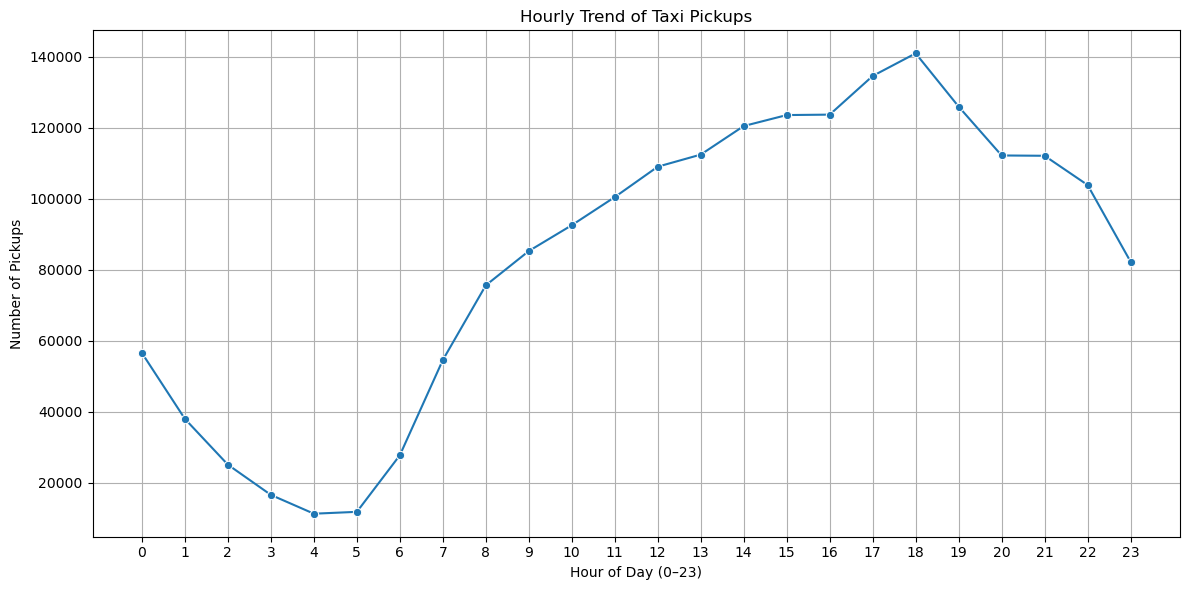

In [55]:
# Find and show the hourly trends in taxi pickups
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
hourly_trend = df.groupby('pickup_hour').size().reset_index(name='num_pickups')

plt.figure(figsize=(12, 6))
sns.lineplot(x='pickup_hour', y='num_pickups', data=hourly_trend, marker='o')
plt.title('Hourly Trend of Taxi Pickups')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


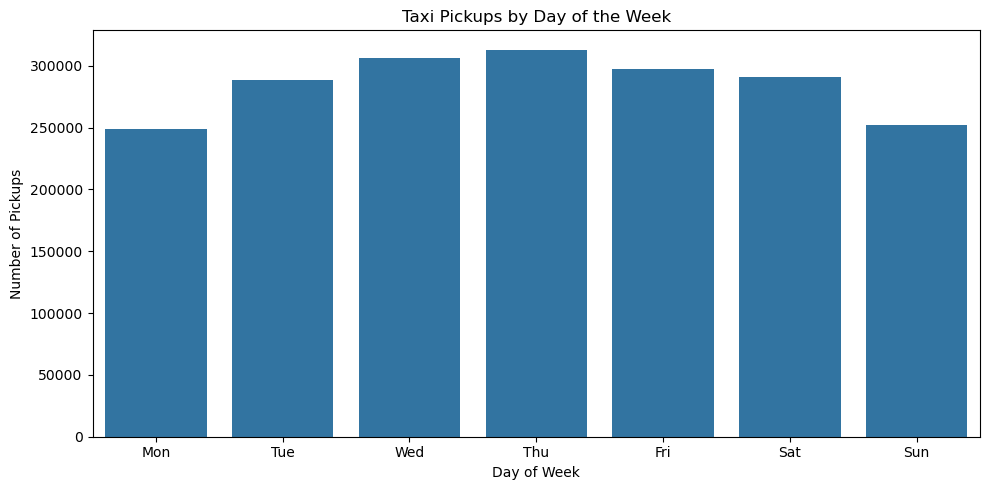

In [57]:
# Find and show the daily trends in taxi pickups (days of the week)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6
daily_trend = df.groupby('pickup_dayofweek').size().reset_index(name='num_pickups')
plt.figure(figsize=(10, 5))
sns.barplot(x='pickup_dayofweek', y='num_pickups', data=daily_trend)
plt.title('Taxi Pickups by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.tight_layout()
plt.show()



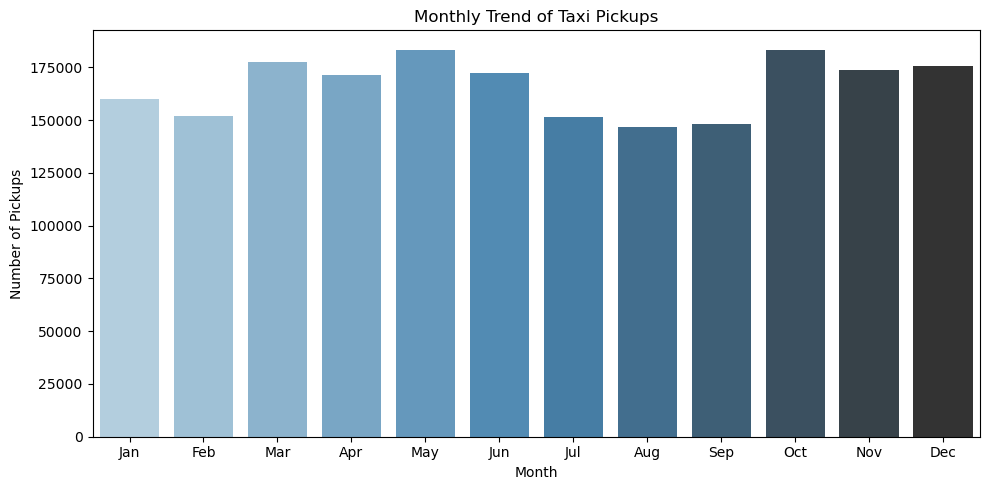

In [59]:
# Show the monthly trends in pickups
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
monthly_trend = df.groupby('pickup_month').size().reset_index(name='num_pickups')
plt.figure(figsize=(10, 5))
sns.barplot(
    x='pickup_month',
    y='num_pickups',
    data=monthly_trend,
    hue='pickup_month',
    palette='Blues_d',
    legend=False
)
plt.title('Monthly Trend of Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()



##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

fare_amount: 683 rows (0.03%) with zero or negative values
tip_amount: 458983 rows (22.99%) with zero or negative values
total_amount: 407 rows (0.02%) with zero or negative values
trip_distance: 39651 rows (1.99%) with zero or negative values


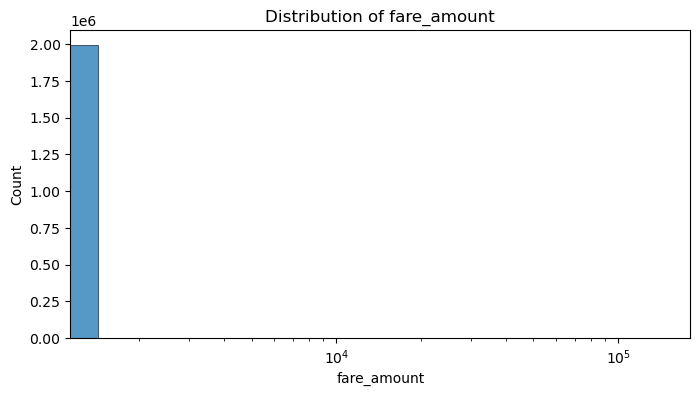

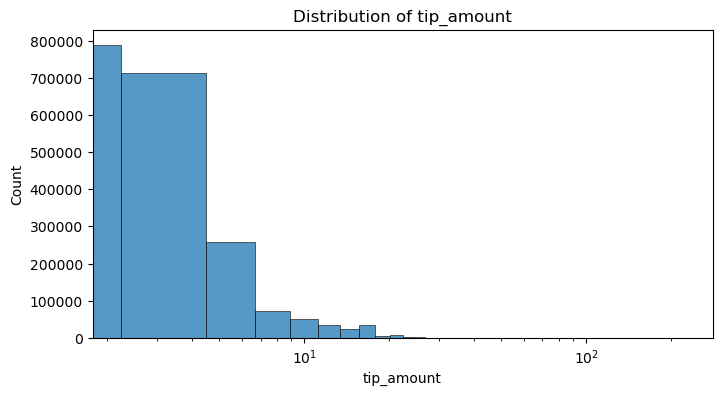

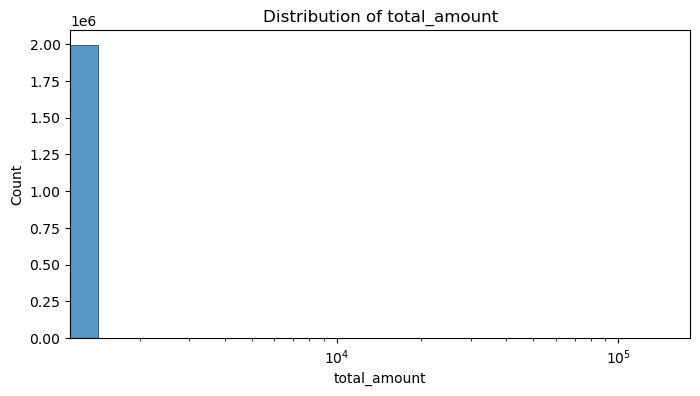

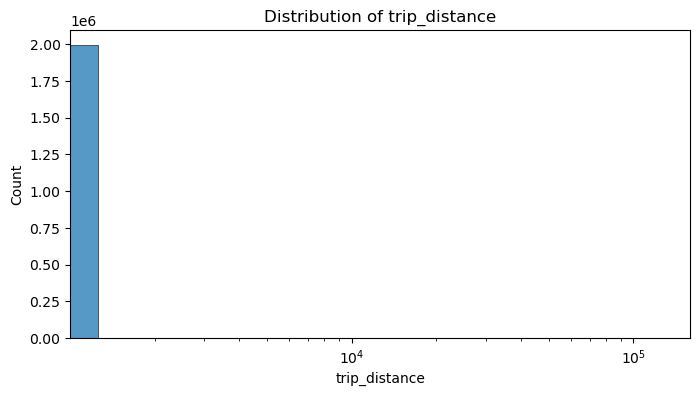

In [61]:
# Analyse the above parameters

cols_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in cols_to_check:
    total = df.shape[0]
    count = df[df[col] <= 0].shape[0]
    percent = (count / total) * 100
    print(f"{col}: {count} rows ({percent:.2f}%) with zero or negative values")
for col in cols_to_check:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=100, kde=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xscale('log')  # Helps reveal distribution
    plt.show()



Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [63]:
# Create a df with non zero entries for the selected parameters.

# Create a DataFrame with non-zero values for the selected parameters
df_non_zero = df[(df['fare_amount'] > 0) & 
                 (df['tip_amount'] > 0) & 
                 (df['total_amount'] > 0) & 
                 (df['trip_distance'] > 0)]

# Check the shape of the filtered DataFrame
print(df_non_zero.shape)


(1527428, 25)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

    pickup_month  total_amount
0              1    4382626.81
1              2    4151405.46
2              3    5002462.70
3              4    4927463.23
4              5    5378903.31
5              6    5064693.95
6              7    4397899.97
7              8    4300226.09
8              9    4606897.18
9             10    5453844.49
10            11    5061311.04
11            12    5121199.36


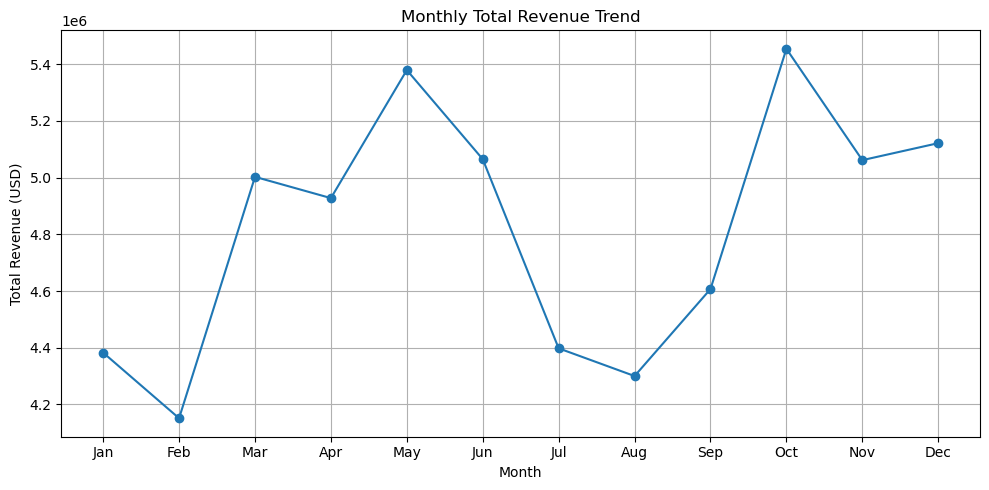

In [65]:
# Group data by month and analyse monthly revenue
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract month
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

# Group by month and sum total revenue
monthly_revenue = df.groupby('pickup_month')['total_amount'].sum().reset_index()

# Display results
print(monthly_revenue)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(monthly_revenue['pickup_month'], monthly_revenue['total_amount'], marker='o')
plt.title('Monthly Total Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (USD)')
plt.xticks(ticks=range(1, 13), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [67]:
# Calculate proportion of each quarter
# Ensure datetime and quarter column
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['quarter'] = df['tpep_pickup_datetime'].dt.quarter

# Group by quarter and sum revenue
quarterly_revenue = df.groupby('quarter')['total_amount'].sum().reset_index()

# Calculate proportion of each quarter
total_rev = quarterly_revenue['total_amount'].sum()
quarterly_revenue['proportion'] = quarterly_revenue['total_amount'] / total_rev

# Display the results
print(quarterly_revenue)


   quarter  total_amount  proportion
0        1   13536494.97    0.233997
1        2   15371060.49    0.265710
2        3   13305023.24    0.229996
3        4   15636354.89    0.270296


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

Correlation between trip_distance and fare_amount: 0.006


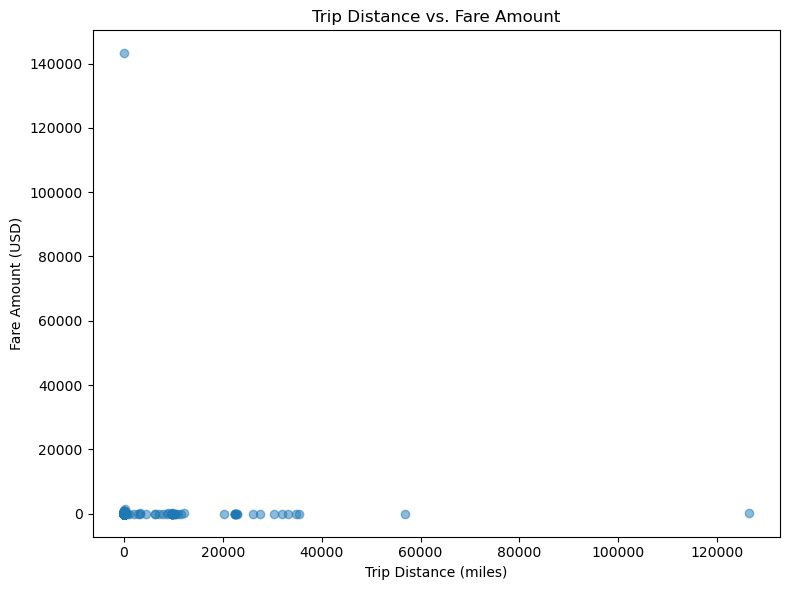

In [69]:
# Show how trip fare is affected by distance

# Filter out trips with zero distance
df_filtered = df[df['trip_distance'] > 0]

# Calculate correlation between trip_distance and fare_amount
corr_value = df_filtered['trip_distance'].corr(df_filtered['fare_amount'])
print(f"Correlation between trip_distance and fare_amount: {corr_value:.3f}")

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_filtered['trip_distance'], df_filtered['fare_amount'], alpha=0.5)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount (USD)')
plt.title('Trip Distance vs. Fare Amount')
plt.tight_layout()
plt.show()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Correlation between fare_amount and trip_duration: 0.047


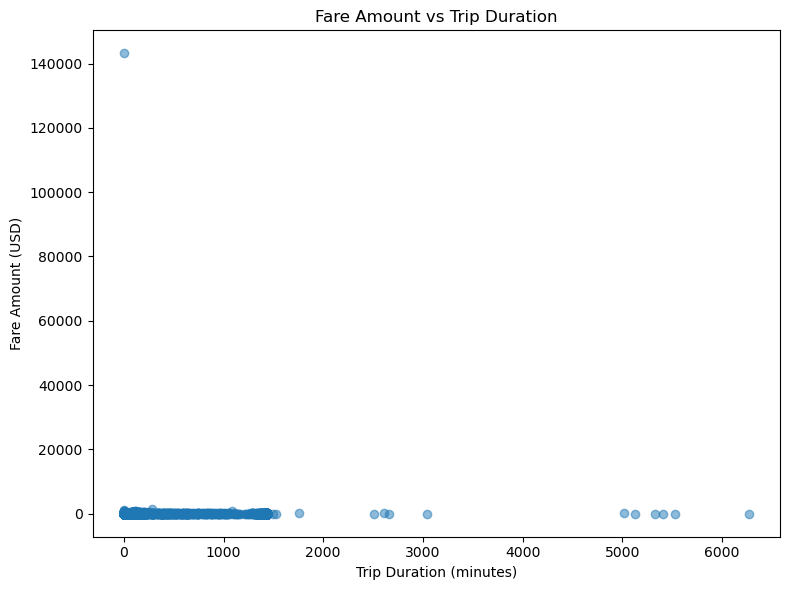

In [73]:
# Show relationship between fare and trip duration
# Ensure datetime columns are in the correct format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Calculate trip duration in minutes
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Remove rows with zero or negative trip duration (outliers or invalid data)
df_filtered = df[df['trip_duration'] > 0]

# Calculate correlation between fare_amount and trip_duration
corr_value = df_filtered['fare_amount'].corr(df_filtered['trip_duration'])
print(f"Correlation between fare_amount and trip_duration: {corr_value:.3f}")

# Create the scatter plot for fare_amount vs trip_duration
plt.figure(figsize=(8, 6))
plt.scatter(df_filtered['trip_duration'], df_filtered['fare_amount'], alpha=0.5)
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount (USD)')
plt.title('Fare Amount vs Trip Duration')
plt.tight_layout()
plt.show()


Correlation between fare_amount and passenger_count: 0.008


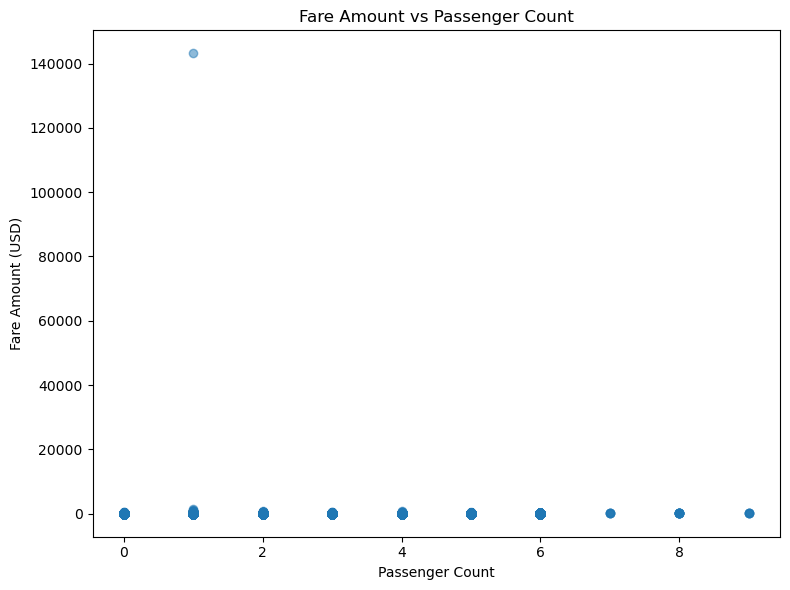

In [76]:
# Show relationship between fare and number of passengers

# Calculate correlation between fare_amount and passenger_count
corr_fare_passenger_count = df['fare_amount'].corr(df['passenger_count'])
print(f"Correlation between fare_amount and passenger_count: {corr_fare_passenger_count:.3f}")

# Create the scatter plot for fare_amount vs passenger_count
plt.figure(figsize=(8, 6))
plt.scatter(df['passenger_count'], df['fare_amount'], alpha=0.5)
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount (USD)')
plt.title('Fare Amount vs Passenger Count')
plt.tight_layout()
plt.show()

Correlation between tip_amount and trip_distance: 0.022


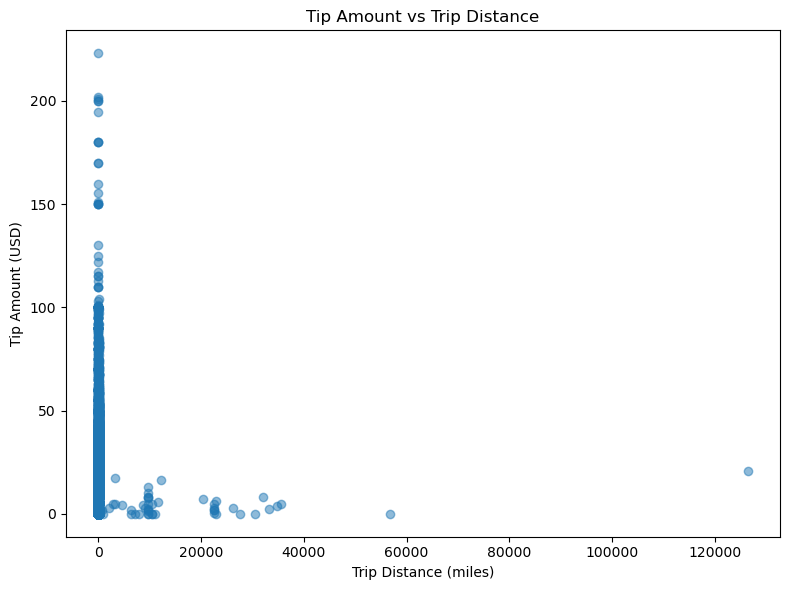

In [77]:
# Show relationship between tip and trip distance

# Calculate correlation between tip_amount and trip_distance
corr_tip_distance = df['tip_amount'].corr(df['trip_distance'])
print(f"Correlation between tip_amount and trip_distance: {corr_tip_distance:.3f}")

# Create the scatter plot for tip_amount vs trip_distance
plt.figure(figsize=(8, 6))
plt.scatter(df['trip_distance'], df['tip_amount'], alpha=0.5)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount (USD)')
plt.title('Tip Amount vs Trip Distance')
plt.tight_layout()
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

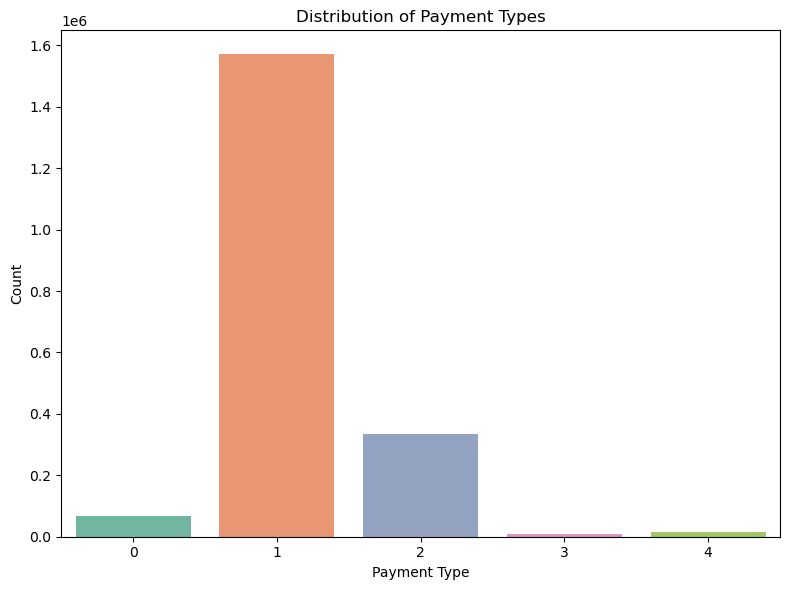

Proportion of each payment type (%):
payment_type
1    78.688888
2    16.691616
0     3.423341
4     0.722773
3     0.473382
Name: proportion, dtype: float64


In [82]:
# Analyse the distribution of different payment types (payment_type).
# Analyze the distribution of payment types
plt.figure(figsize=(8, 6))
sns.countplot(x='payment_type', hue='payment_type', data=df, palette='Set2', legend=False)
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.title('Distribution of Payment Types')
plt.tight_layout()
plt.show()

# Proportions
payment_type_counts = df['payment_type'].value_counts(normalize=True) * 100
print("Proportion of each payment type (%):")
print(payment_type_counts)



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [84]:
 !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [86]:
# Read the shapefile using geopandas
zones = gpd.read_file(r'D:\Datasets and Dictionary\taxi_zones\taxi_zones.shp')

zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

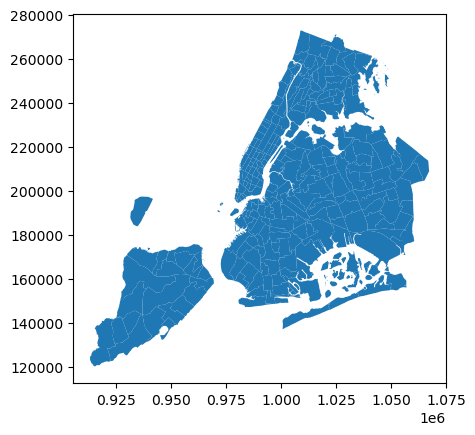

In [88]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [90]:
# Merge zones and trip records using locationID and PULocationID
df_pickup = df.merge(zones, left_on='PULocationID', right_on='LocationID', how='left', suffixes=('_pickup', '_zone'))

# Merge zones with trip records based on DOLocationID (dropoff location)
df_trip = df_pickup.merge(zones, left_on='DOLocationID', right_on='LocationID', how='left', suffixes=('_pickup', '_dropoff'))

# Display the merged data
df_trip.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,LocationID_pickup,borough_pickup,geometry_pickup,OBJECTID_dropoff,Shape_Leng_dropoff,Shape_Area_dropoff,zone_dropoff,LocationID_dropoff,borough_dropoff,geometry_dropoff
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,138.0,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031...",256.0,0.067915,0.000169,Williamsburg (South Side),256.0,Brooklyn,"POLYGON ((995798.638 199155.97, 996223.601 198..."
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,161.0,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",237.0,0.042213,0.000096,Upper East Side South,237.0,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21..."
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,237.0,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",141.0,0.041514,0.000077,Lenox Hill West,141.0,Manhattan,"POLYGON ((994839.073 216123.698, 994786.74 216..."
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,143.0,Manhattan,"POLYGON ((989338.1 223572.253, 989368.225 2235...",142.0,0.038176,0.000076,Lincoln Square East,142.0,Manhattan,"POLYGON ((989380.305 218980.247, 989359.803 21..."
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,NaN,66,107,0,...,66.0,Brooklyn,"POLYGON ((990055.507 196472.349, 990004.46 196...",107.0,0.038041,0.000075,Gramercy,107.0,Manhattan,"POLYGON ((989131.643 205749.904, 989084.531 20..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [92]:
# Group data by location and calculate the number of trips
pickup_trip_count = df_trip.groupby('PULocationID').size().reset_index(name='trip_count')

# Grouping by Dropoff Location (DOLocationID) and counting the number of trips
dropoff_trip_count = df_trip.groupby('DOLocationID').size().reset_index(name='trip_count')

# Display the results
pickup_trip_count.head(), dropoff_trip_count.head()


(   PULocationID  trip_count
 0             1         228
 1             2           2
 2             3          47
 3             4        2483
 4             5          14,
    DOLocationID  trip_count
 0             1        6048
 1             2           4
 2             3         172
 3             4        7600
 4             5          33)

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [94]:
# Merge trip counts back to the zones GeoDataFrame
# Assume you have:
# zones: GeoDataFrame of taxi zones with a 'LocationID' column
# pickup_trip_count: DataFrame with 'PULocationID' and 'trip_count'
# dropoff_trip_count: DataFrame with 'DOLocationID' and 'trip_count'

# 1. Merge pickup counts into zones
zones_counts = zones.merge(
    pickup_trip_count.rename(columns={'PULocationID': 'LocationID', 'trip_count': 'pickup_trip_count'}),
    on='LocationID',
    how='left'
)

# 2. Merge dropoff counts into the same GeoDataFrame
zones_counts = zones_counts.merge(
    dropoff_trip_count.rename(columns={'DOLocationID': 'LocationID', 'trip_count': 'dropoff_trip_count'}),
    on='LocationID',
    how='left'
)

# 3. Fill NaN counts with zero and convert to integer
zones_counts['pickup_trip_count'] = zones_counts['pickup_trip_count'].fillna(0).astype(int)
zones_counts['dropoff_trip_count'] = zones_counts['dropoff_trip_count'].fillna(0).astype(int)

# 4. Inspect the merged GeoDataFrame
zones_counts.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,pickup_trip_count,dropoff_trip_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",228,6048
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2,4
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",47,172
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",2483,7600
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",14,33


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

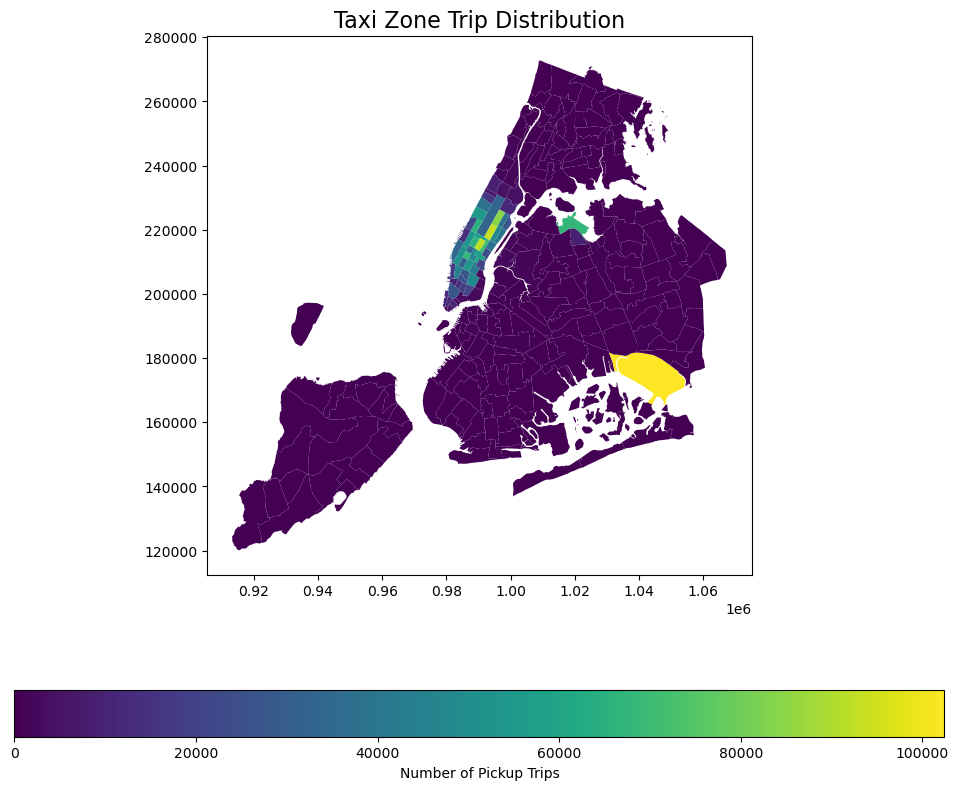

In [96]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))


# Plot the map and display it
zones_counts.plot(
    column='pickup_trip_count',  # Column representing the number of trips (you can change this to 'dropoff_trip_count' if needed)
    ax=ax,
    legend=True,
    legend_kwds={'label': "Number of Pickup Trips", 'orientation': "horizontal"},
    cmap='viridis'  # Use the 'viridis' color map or try others like 'Blues', 'YlOrRd', etc.
)

# Set title for the map
ax.set_title('Taxi Zone Trip Distribution', fontsize=16)

# Show the plot
plt.show()



In [98]:
# can you try displaying the zones DF sorted by the number of trips?

# Sort the zones_counts DataFrame by 'pickup_trip_count' in descending order
sorted_zones_df = zones_counts.sort_values(by='pickup_trip_count', ascending=False)

# Display the top 10 rows (or more if you'd like) to see the zones with the highest trip counts
print(sorted_zones_df.head(10))  # Show top 10 zones by pickup trip count


     OBJECTID  Shape_Leng  Shape_Area                          zone  \
131       132    0.245479    0.002038                   JFK Airport   
236       237    0.042213    0.000096         Upper East Side South   
160       161    0.035804    0.000072                Midtown Center   
235       236    0.044252    0.000103         Upper East Side North   
161       162    0.035270    0.000048                  Midtown East   
137       138    0.107467    0.000537             LaGuardia Airport   
185       186    0.024696    0.000037  Penn Station/Madison Sq West   
229       230    0.031028    0.000056     Times Sq/Theatre District   
141       142    0.038176    0.000076           Lincoln Square East   
169       170    0.045769    0.000074                   Murray Hill   

     LocationID    borough                                           geometry  \
131         132     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
236         237  Manhattan  POLYGON ((993633.442 216961.

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [100]:
# Find routes which have the slowest speeds at different times of the day


# Ensure trip_duration is in hours
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 3600  # hours

# Filter out zero-duration or zero-distance trips
df_routes = df[(df['trip_duration'] > 0) & (df['trip_distance'] > 0)]

# Use .loc to avoid SettingWithCopyWarning when adding 'pickup_hour'
df_routes.loc[:, 'pickup_hour'] = df_routes['tpep_pickup_datetime'].dt.hour

# Group by route and hour, compute average distance and average duration
route_stats = (
    df_routes
    .groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])
    .agg(avg_distance=('trip_distance', 'mean'),
         avg_duration=('trip_duration', 'mean'))
    .reset_index()
)

# Compute speed (miles per hour)
route_stats['speed_mph'] = route_stats['avg_distance'] / route_stats['avg_duration']

# Identify the slowest route for each hour (lowest speed for each hour)
slowest_routes_by_hour = route_stats.loc[route_stats.groupby('pickup_hour')['speed_mph'].idxmin()]

# Display results
slowest_routes_by_hour[['PULocationID', 'DOLocationID', 'pickup_hour', 'avg_distance', 'avg_duration', 'speed_mph']]


,PULocationID,DOLocationID,pickup_hour,avg_distance,avg_duration,speed_mph
23933,74,116,0,2.315000,11.448194,0.202215
126388,258,258,1,0.020000,0.762500,0.026230
67765,144,100,2,2.880000,23.613889,0.121962
11823,45,249,3,1.660000,11.993889,0.138404
79709,162,162,4,0.640000,5.955972,0.107455
64575,142,142,5,0.575000,11.801389,0.048723
22255,70,138,6,1.490000,17.376111,0.085750
3347,13,209,7,0.860000,11.829028,0.072703
36027,100,7,8,0.220000,5.573889,0.039470
42491,113,244,9,0.420000,4.956389,0.084739


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

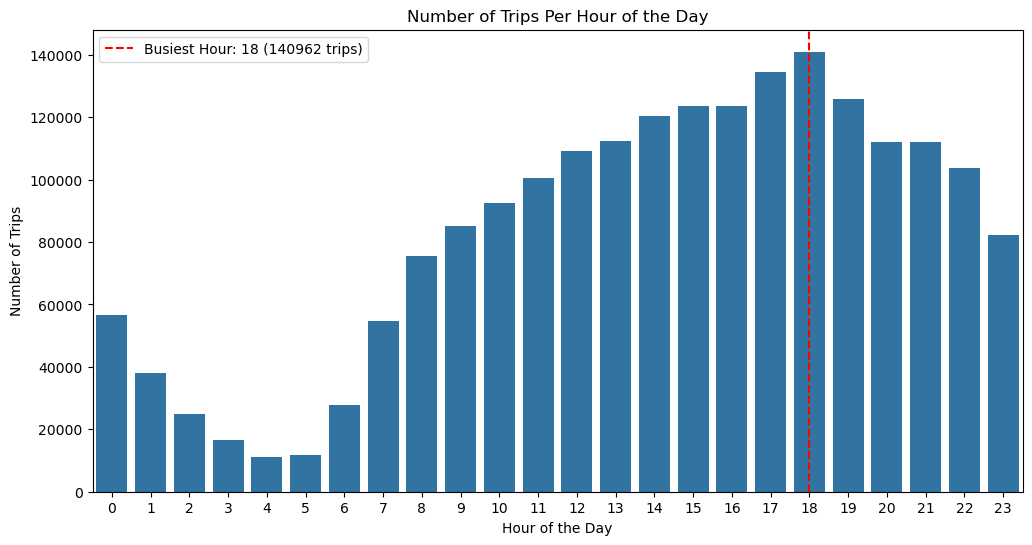

The busiest hour is 18:00 with 140962 trips.


In [102]:
# Visualise the number of trips per hour and find the busiest hour
# Add a 'pickup_hour' column to the DataFrame
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Count the number of trips for each hour
trips_per_hour = df.groupby('pickup_hour').size()

# Find the busiest hour
busiest_hour = trips_per_hour.idxmax()
busiest_hour_count = trips_per_hour.max()

# Visualize the number of trips per hour
plt.figure(figsize=(12, 6))
sns.countplot(x='pickup_hour', data=df)

# Show the busiest hour
plt.axvline(x=busiest_hour, color='red', linestyle='--', label=f'Busiest Hour: {busiest_hour} ({busiest_hour_count} trips)')
plt.legend()
plt.title('Number of Trips Per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

# Output the busiest hour and the number of trips
print(f"The busiest hour is {busiest_hour}:00 with {busiest_hour_count} trips.")


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [104]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 1.0

# 1. Count trips per hour
trips_per_hour = df.groupby('pickup_hour').size()

# 2. Identify the five busiest hours
top5_sample = trips_per_hour.sort_values(ascending=False).head(5)
print("Top 5 busiest hours (actual counts):")
print(top5_sample)

# 3. Scale up (no change if fraction=1.0)
top5_actual = (top5_sample / sample_fraction).astype(int)
print("\nEstimated actual number of trips in those hours:")
print(top5_actual)



Top 5 busiest hours (actual counts):
pickup_hour
18    140962
17    134583
19    125949
16    123692
15    123570
dtype: int64

Estimated actual number of trips in those hours:
pickup_hour
18    140962
17    134583
19    125949
16    123692
15    123570
dtype: int32


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

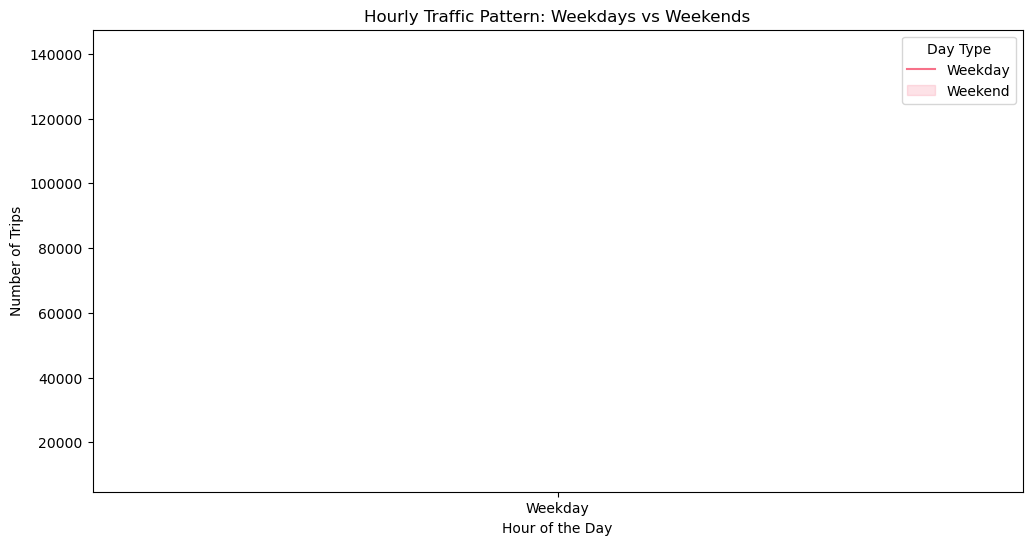

In [106]:
# Compare traffic trends for the week days and weekends

# Ensure the 'pickup_dayofweek' column is in numerical format (0=Mon, 6=Sun)
# You may need to convert it to integer if it's stored as strings
df['pickup_dayofweek'] = df['pickup_dayofweek'].map({'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Fri': 4, 'Sat': 5, 'Sun': 6})

# Create a column to identify weekdays (Mon-Fri) vs weekends (Sat-Sun)
df['pickup_day_type'] = df['pickup_dayofweek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Group by hour and day type, then count the trips
hourly_trips = df.groupby(['pickup_hour', 'pickup_day_type']).size().unstack()

# Visualize the comparison between weekdays and weekends
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_trips.T)  # Transpose for better plotting
plt.title('Hourly Traffic Pattern: Weekdays vs Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.legend(title='Day Type', labels=['Weekday', 'Weekend'])
plt.show()



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [110]:
# Find top 10 pickup and dropoff zones
# 1. Identify the top 10 pickup zones by the number of pickups
top10_pickup_zones = df['PULocationID'].value_counts().head(10)
print("Top 10 Pickup Zones by Number of Pickups:")
print(top10_pickup_zones)

# 2. Identify the top 10 dropoff zones by the number of dropoffs
top10_dropoff_zones = df['DOLocationID'].value_counts().head(10)
print("Top 10 Dropoff Zones by Number of Dropoffs:")
print(top10_dropoff_zones)


Top 10 Pickup Zones by Number of Pickups:
PULocationID
132    102219
237     93239
161     92144
236     83944
162     70314
138     67836
186     67656
230     66002
142     65983
170     58883
Name: count, dtype: int64
Top 10 Dropoff Zones by Number of Dropoffs:
DOLocationID
236    87819
237    83572
161    77593
230    61050
170    58689
162    56440
142    55818
239    55629
141    52486
68     50470
Name: count, dtype: int64


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [112]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# 1. Calculate the number of pickups and dropoffs for each zone
pickup_counts = df['PULocationID'].value_counts()
dropoff_counts = df['DOLocationID'].value_counts()

# 2. Merge the pickup and dropoff counts into a single DataFrame
zone_counts = pd.DataFrame({
    'pickup_count': pickup_counts,
    'dropoff_count': dropoff_counts
}).fillna(0)  # Fill NaN with 0 for zones with no pickups or dropoffs

# 3. Calculate the pickup/dropoff ratio for each zone
zone_counts['pickup_to_dropoff_ratio'] = zone_counts['pickup_count'] / (zone_counts['dropoff_count'] + 1e-6)  # Avoid division by 0

# 4. Find the top 10 and bottom 10 pickup/dropoff ratios
top10_ratio = zone_counts['pickup_to_dropoff_ratio'].sort_values(ascending=False).head(10)
bottom10_ratio = zone_counts['pickup_to_dropoff_ratio'].sort_values(ascending=True).head(10)

# Display the results
print("Top 10 Pickup/Dropoff Ratios:")
print(top10_ratio)
print("\nBottom 10 Pickup/Dropoff Ratios:")
print(bottom10_ratio)


Top 10 Pickup/Dropoff Ratios:
199    2.000000e+06
70     8.169742e+00
132    4.253277e+00
138    2.623506e+00
186    1.554096e+00
114    1.381277e+00
43     1.367963e+00
249    1.332068e+00
162    1.245819e+00
100    1.190972e+00
Name: pickup_to_dropoff_ratio, dtype: float64

Bottom 10 Pickup/Dropoff Ratios:
30     0.000000
176    0.000000
99     0.000000
245    0.031250
1      0.037698
115    0.040000
257    0.052506
156    0.064516
64     0.068493
172    0.071429
Name: pickup_to_dropoff_ratio, dtype: float64


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [114]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
# Define night hours: 11 PM (23) through 5 AM (5)
night_hours = list(range(23, 24)) + list(range(0, 6))

# Filter trips that start during night hours
df_night = df[df['pickup_hour'].isin(night_hours)]

# 1. Top 10 pickup zones during night hours
top10_night_pickup = df_night['PULocationID'].value_counts().head(10)
print("Top 10 Pickup Zones (11 PM–5 AM):")
print(top10_night_pickup)

# 2. Top 10 dropoff zones during night hours
top10_night_dropoff = df_night['DOLocationID'].value_counts().head(10)
print("\nTop 10 Dropoff Zones (11 PM–5 AM):")
print(top10_night_dropoff)


Top 10 Pickup Zones (11 PM–5 AM):
PULocationID
79     17340
132    15355
249    13864
48     11368
148    10748
114     9713
230     8966
186     7500
164     6808
68      6736
Name: count, dtype: int64

Top 10 Dropoff Zones (11 PM–5 AM):
DOLocationID
79     9204
48     7574
170    6868
68     6433
107    6255
141    5839
263    5530
249    5396
230    5139
148    4893
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [116]:
# Filter for night hours (11 PM to 5 AM)

# Define night hours: 11 PM (23) through 5 AM (5)
night_hours = list(range(23, 24)) + list(range(0, 6))

# Filter data into night and day
df_night = df[df['pickup_hour'].isin(night_hours)]
df_day = df[~df['pickup_hour'].isin(night_hours)]

# Calculate total revenue for each
nighttime_revenue = df_night['total_amount'].sum()
daytime_revenue = df_day['total_amount'].sum()

# Calculate total revenue
total_revenue = nighttime_revenue + daytime_revenue

# Calculate the revenue share
nighttime_revenue_share = nighttime_revenue / total_revenue * 100
daytime_revenue_share = daytime_revenue / total_revenue * 100

# Display the results
print(f"Nighttime revenue share: {nighttime_revenue_share:.2f}%")
print(f"Daytime revenue share: {daytime_revenue_share:.2f}%")

Nighttime revenue share: 12.30%
Daytime revenue share: 87.70%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

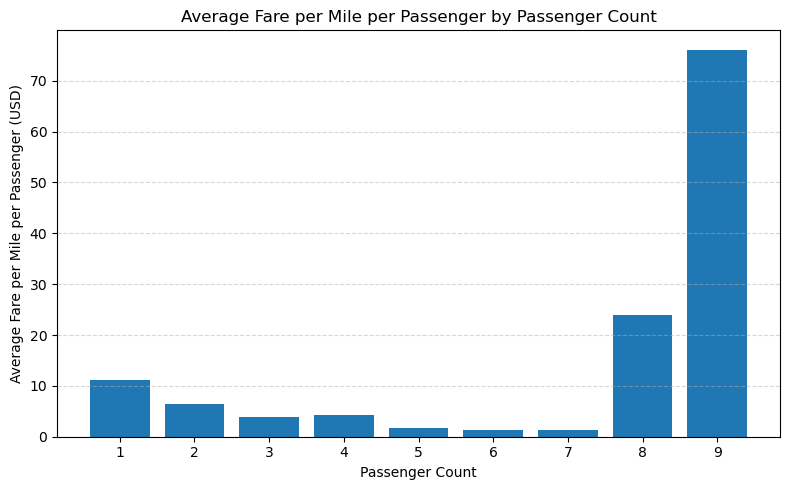

In [118]:
# Analyse the fare per mile per passenger for different passenger counts


# Only keep relevant columns to reduce memory usage
df2 = df[['passenger_count', 'trip_distance', 'fare_amount']].copy()

# Filter out invalid entries
df2 = df2[(df2['trip_distance'] > 0) & (df2['passenger_count'] > 0)]

# Downcast float columns to reduce memory use
df2['fare_amount'] = pd.to_numeric(df2['fare_amount'], downcast='float')
df2['trip_distance'] = pd.to_numeric(df2['trip_distance'], downcast='float')
df2['passenger_count'] = pd.to_numeric(df2['passenger_count'], downcast='integer')

# Calculate metrics
df2['fare_per_mile_per_passenger'] = (df2['fare_amount'] / df2['trip_distance']) / df2['passenger_count']

# Group and compute average
result = df2.groupby('passenger_count', as_index=False)['fare_per_mile_per_passenger'].mean()

# Plot
plt.figure(figsize=(8, 5))
plt.bar(result['passenger_count'], result['fare_per_mile_per_passenger'])
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare per Mile per Passenger (USD)')
plt.title('Average Fare per Mile per Passenger by Passenger Count')
plt.xticks(result['passenger_count'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

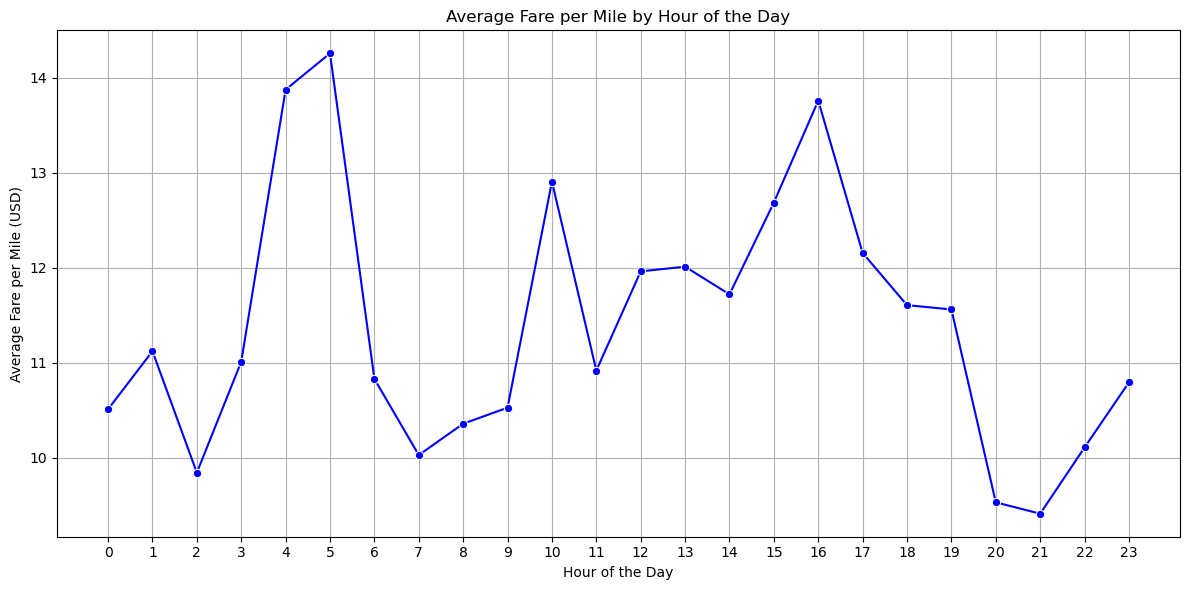

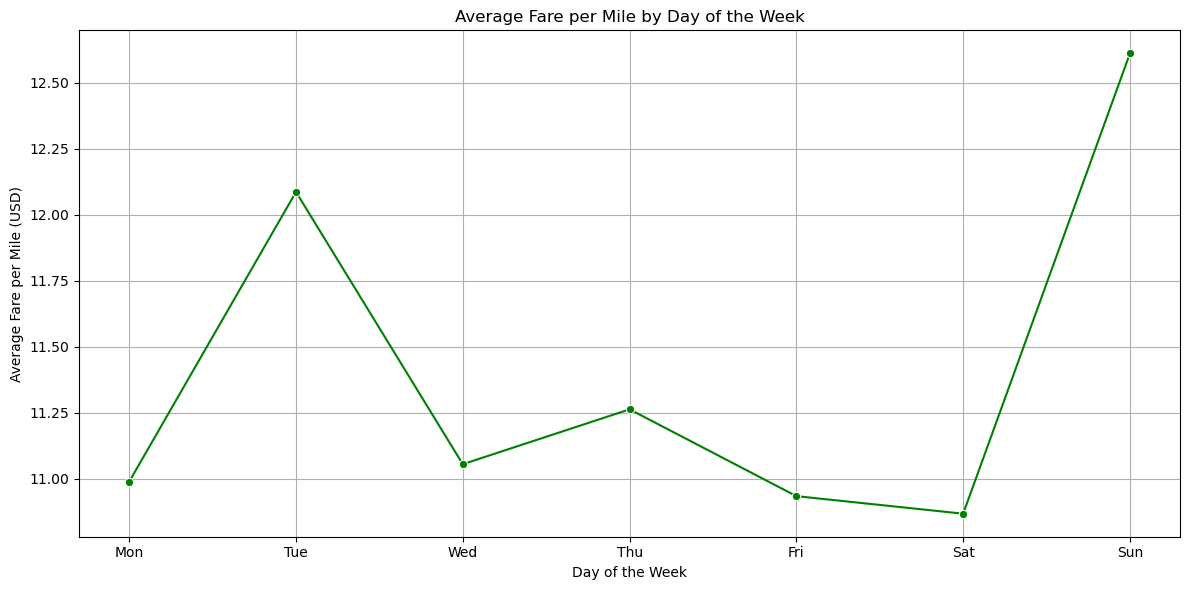

Average Fare per Mile by Hour:
    pickup_hour  fare_per_mile
0             0      10.512968
1             1      11.123265
2             2       9.845465
3             3      11.012062
4             4      13.874234
5             5      14.255600
6             6      10.831666
7             7      10.030826
8             8      10.360459
9             9      10.529065
10           10      12.906775
11           11      10.919219
12           12      11.962692
13           13      12.012074
14           14      11.720849
15           15      12.686565
16           16      13.758293
17           17      12.156614
18           18      11.607267
19           19      11.562251
20           20       9.533622
21           21       9.414138
22           22      10.110988
23           23      10.795725

Average Fare per Mile by Day of the Week:
   pickup_dayofweek  fare_per_mile
0                 0      10.988888
1                 1      12.086164
2                 2      11.055125
3          

In [120]:
# Compare the average fare per mile for different days and for different times of the day

# Ensure no zero or negative values
df_clean = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)].copy()

# Calculate fare per mile
df_clean['fare_per_mile'] = df_clean['fare_amount'] / df_clean['trip_distance']

# Extract hour and day of week from the datetime
df_clean['pickup_hour'] = df_clean['tpep_pickup_datetime'].dt.hour
df_clean['pickup_dayofweek'] = df_clean['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6

# Group by hour and calculate average fare per mile
avg_fare_by_hour = df_clean.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()

# Group by day of the week and calculate average fare per mile
avg_fare_by_day = df_clean.groupby('pickup_dayofweek')['fare_per_mile'].mean().reset_index()

# Plot the average fare per mile by hour
plt.figure(figsize=(12, 6))
sns.lineplot(x='pickup_hour', y='fare_per_mile', data=avg_fare_by_hour, marker='o', color='blue')
plt.title('Average Fare per Mile by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile (USD)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# Plot the average fare per mile by day of the week
plt.figure(figsize=(12, 6))
sns.lineplot(x='pickup_dayofweek', y='fare_per_mile', data=avg_fare_by_day, marker='o', color='green')
plt.title('Average Fare per Mile by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Fare per Mile (USD)')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.tight_layout()
plt.show()

# Print results for reference
print("Average Fare per Mile by Hour:")
print(avg_fare_by_hour)
print("\nAverage Fare per Mile by Day of the Week:")
print(avg_fare_by_day)



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

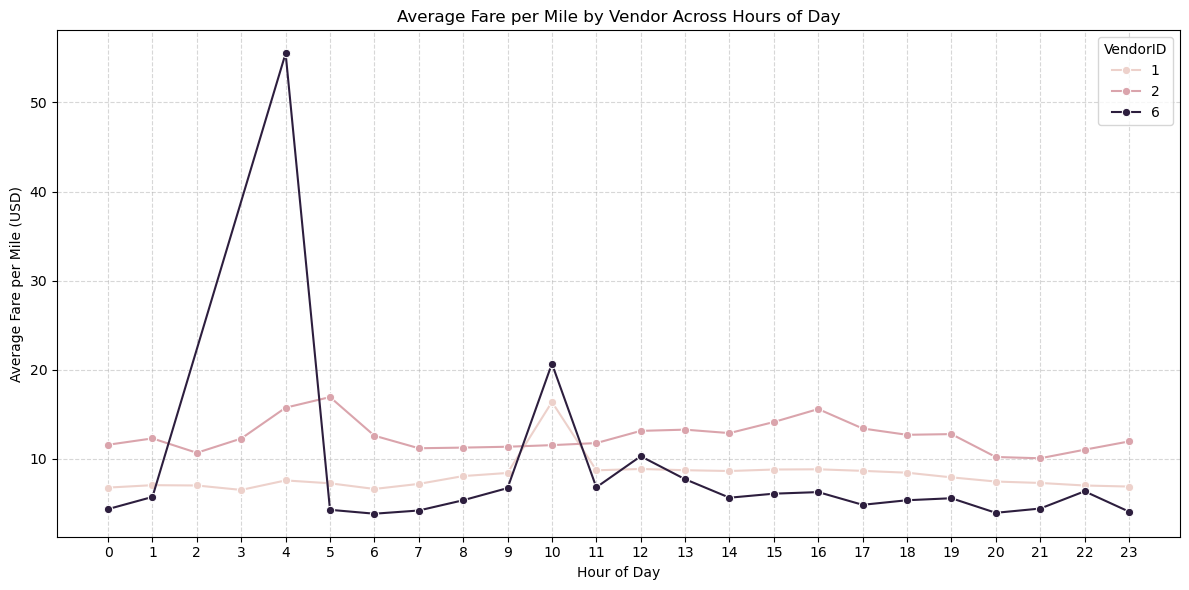

In [122]:
# Compare fare per mile for different vendors

# Compare fare per mile for different vendors
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Clean & prepare the data
df_vm = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)].copy()
df_vm['fare_per_mile'] = df_vm['fare_amount'] / df_vm['trip_distance']
df_vm['pickup_hour']   = df_vm['tpep_pickup_datetime'].dt.hour

# 2. Group by VendorID and hour, compute average fare_per_mile
vendor_hour_stats = (
    df_vm
    .groupby(['VendorID', 'pickup_hour'], observed=True)['fare_per_mile']
    .mean()
    .reset_index()
)

# 3. Plot the results
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=vendor_hour_stats,
    x='pickup_hour',
    y='fare_per_mile',
    hue='VendorID',
    marker='o'
)
plt.title('Average Fare per Mile by Vendor Across Hours of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare per Mile (USD)')
plt.xticks(range(0, 24))
plt.legend(title='VendorID')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


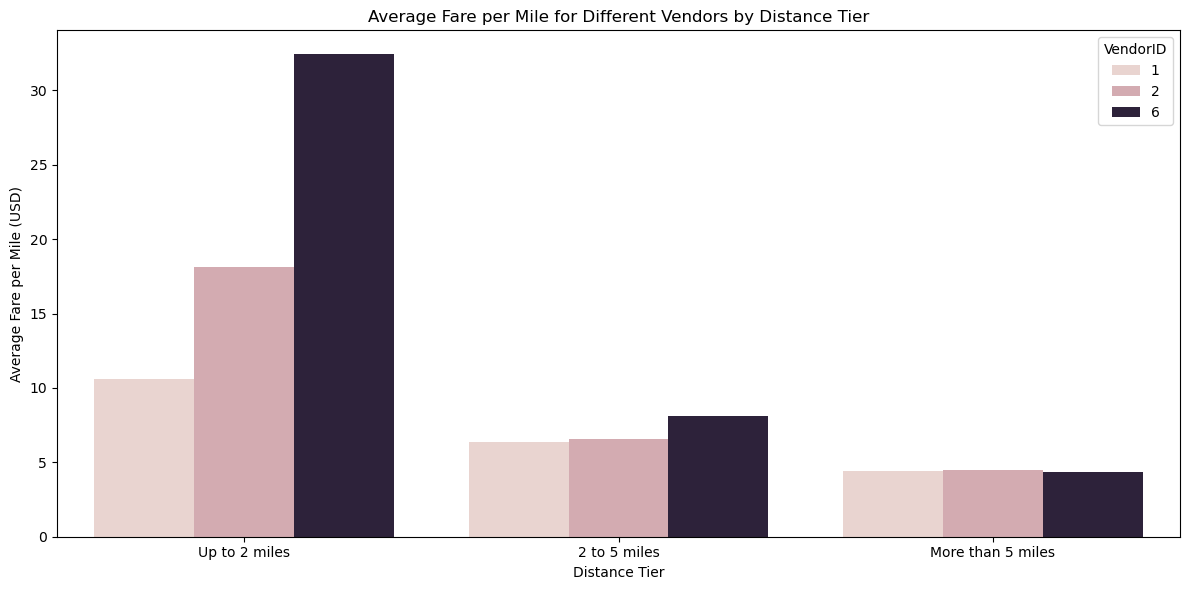

In [124]:
# Defining distance tiers
# Defining distance tiers

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filter out trips with zero or negative fare_amount or trip_distance
df_tiers = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)].copy()

# 2. Calculate fare per mile
df_tiers['fare_per_mile'] = df_tiers['fare_amount'] / df_tiers['trip_distance']

# 3. Define distance tiers
bins = [0, 2, 5, float('inf')]  # Define bins for distance tiers
labels = ['Up to 2 miles', '2 to 5 miles', 'More than 5 miles']
df_tiers['distance_tier'] = pd.cut(df_tiers['trip_distance'], bins=bins, labels=labels)

# 4. Group by vendor and distance tier, then calculate average fare per mile
tiered_fare_stats = (
    df_tiers.groupby(['VendorID', 'distance_tier'], observed=True)['fare_per_mile'].mean().reset_index()

)

# 5. Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(
    data=tiered_fare_stats,
    x='distance_tier',
    y='fare_per_mile',
    hue='VendorID'
)
plt.title('Average Fare per Mile for Different Vendors by Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile (USD)')
plt.tight_layout()
plt.show()



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

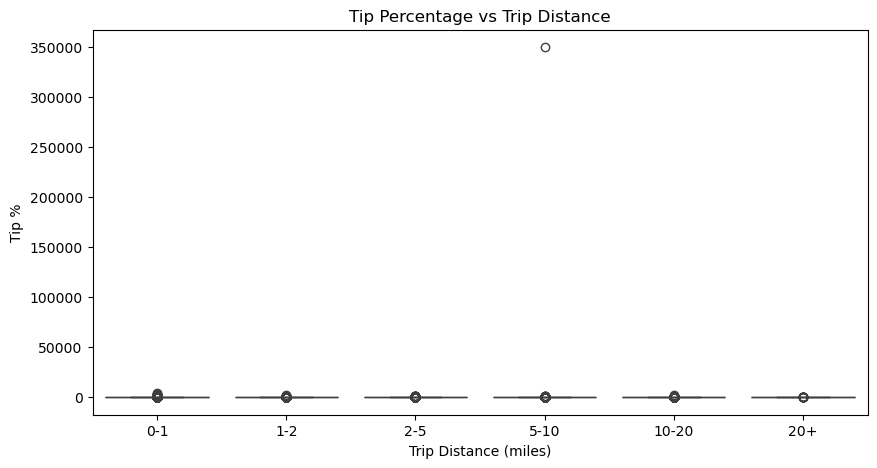

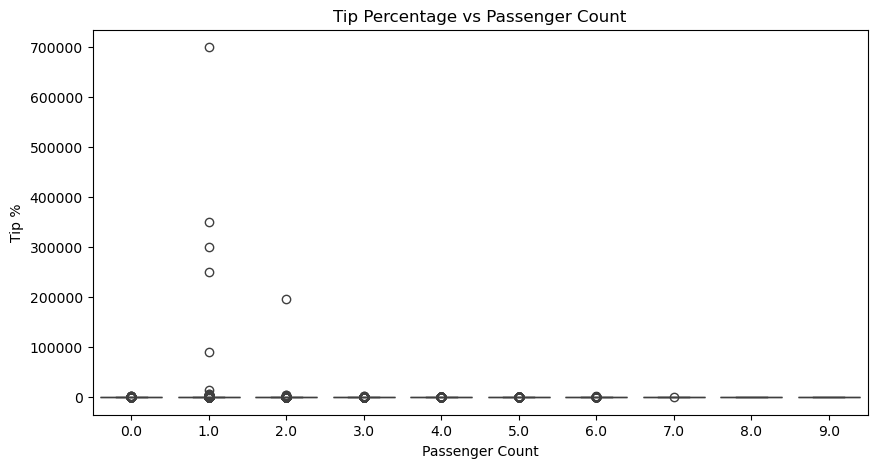

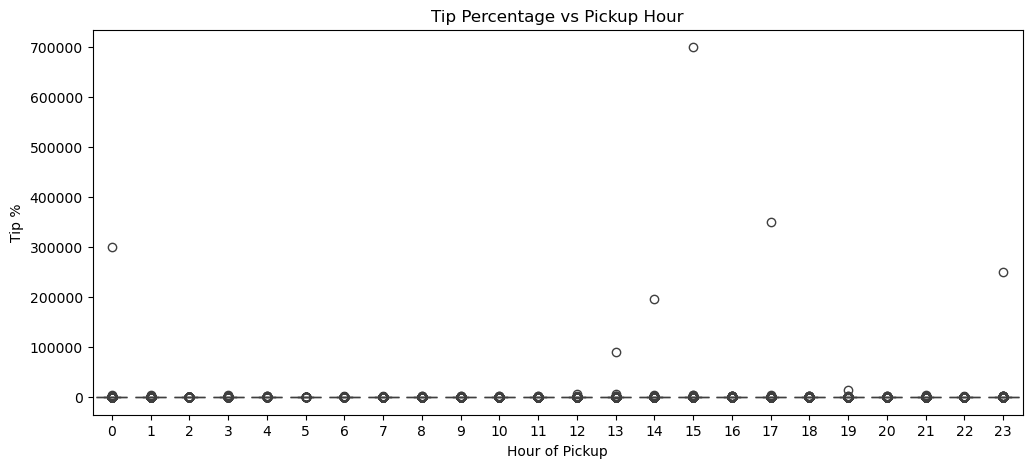

In [126]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
#  Analyze tip percentages based on distances, passenger counts and pickup times


# Avoid division by zero
df = df[df['fare_amount'] > 0]

# Create tip percentage column
df['tip_percentage'] = (df['tip_amount'] / df['fare_amount']) * 100

# Binning trip distances
df['distance_bin'] = pd.cut(df['trip_distance'], bins=[0, 1, 2, 5, 10, 20, np.inf],
                            labels=['0-1', '1-2', '2-5', '5-10', '10-20', '20+'])

# Plot 1: Tip % vs Trip Distance
plt.figure(figsize=(10,5))
sns.boxplot(x='distance_bin', y='tip_percentage', data=df)
plt.title('Tip Percentage vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip %')
plt.show()

# Plot 2: Tip % vs Passenger Count
plt.figure(figsize=(10,5))
sns.boxplot(x='passenger_count', y='tip_percentage', data=df)
plt.title('Tip Percentage vs Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Tip %')
plt.show()

# Plot 3: Tip % vs Hour of Day
plt.figure(figsize=(12,5))
sns.boxplot(x='pickup_hour', y='tip_percentage', data=df)
plt.title('Tip Percentage vs Pickup Hour')
plt.xlabel('Hour of Pickup')
plt.ylabel('Tip %')
plt.show()



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

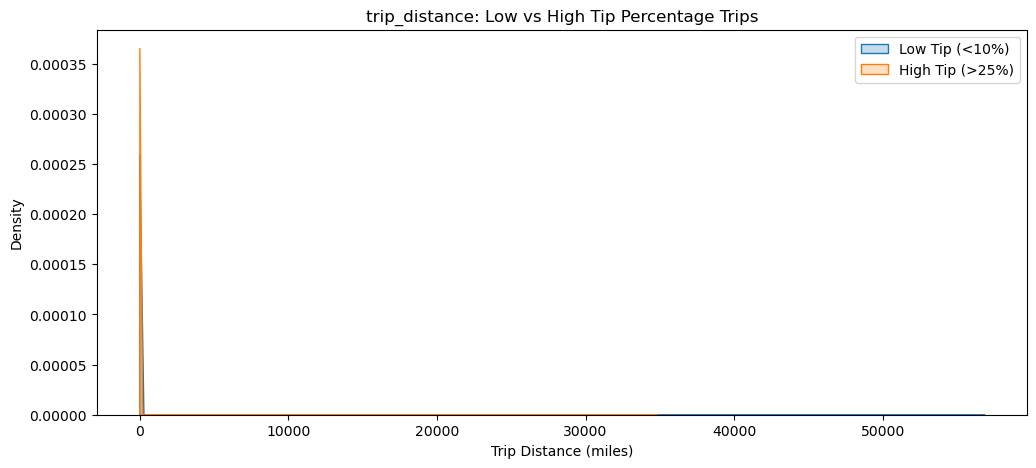

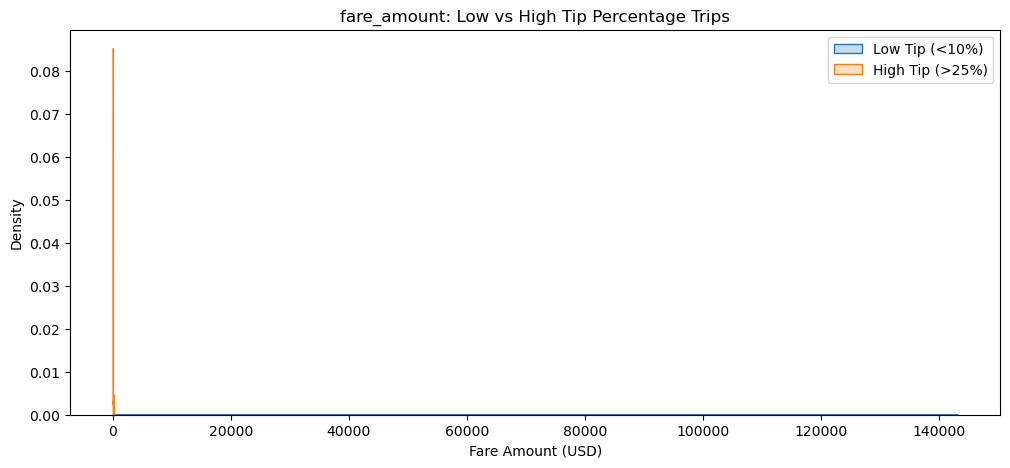

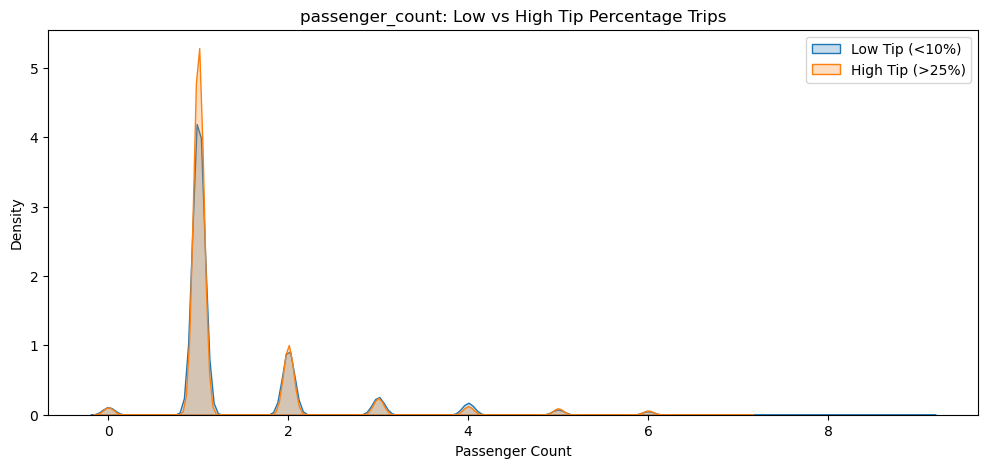

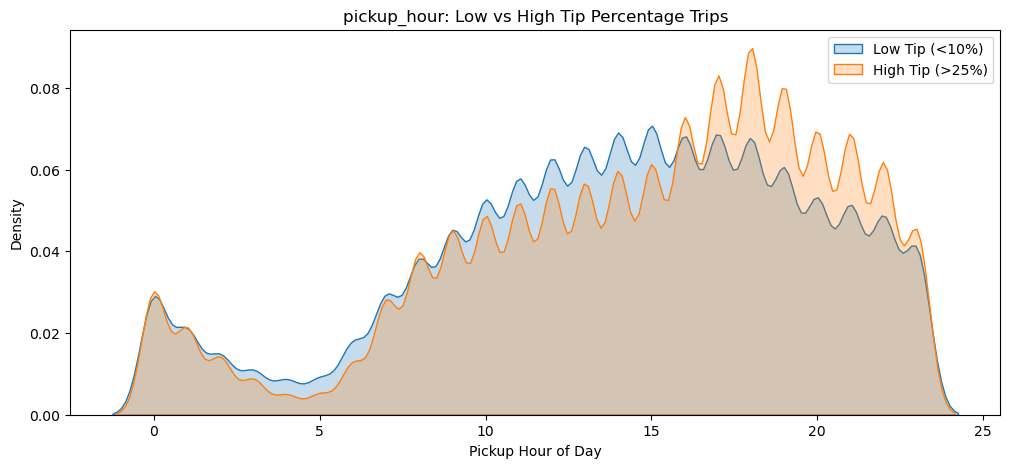

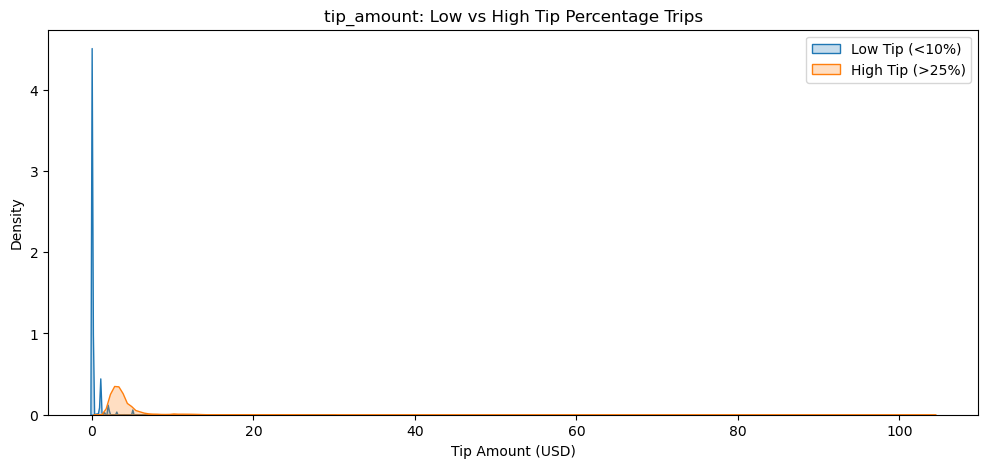

In [127]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
# Create a new column for tip category
df['tip_category'] = pd.cut(df['tip_percentage'], 
                            bins=[-1, 10, 25, 100], 
                            labels=['Low Tip (<10%)', 'Medium Tip (10-25%)', 'High Tip (>25%)'])

# Filter low and high tip cases
low_tip = df[df['tip_category'] == 'Low Tip (<10%)']
high_tip = df[df['tip_category'] == 'High Tip (>25%)']

# Compare distributions
import seaborn as sns
import matplotlib.pyplot as plt

def compare_distributions(feature, xlabel=''):
    plt.figure(figsize=(12,5))
    sns.kdeplot(low_tip[feature], label='Low Tip (<10%)', fill=True)
    sns.kdeplot(high_tip[feature], label='High Tip (>25%)', fill=True)
    plt.title(f'{feature}: Low vs High Tip Percentage Trips')
    plt.xlabel(xlabel if xlabel else feature)
    plt.legend()
    plt.show()


# Compare by trip distance
compare_distributions('trip_distance', 'Trip Distance (miles)')

# Compare by fare amount
compare_distributions('fare_amount', 'Fare Amount (USD)')

# Compare by passenger count
compare_distributions('passenger_count', 'Passenger Count')

# Compare by pickup hour
compare_distributions('pickup_hour', 'Pickup Hour of Day')

# Compare by tip amount directly
compare_distributions('tip_amount', 'Tip Amount (USD)')




**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [133]:
# See how passenger count# See how passenger count varies across hours and days
# Create pivot table for average passenger count
heatmap_data = df.pivot_table(
    index='pickup_dayofweek', 
    columns='pickup_hour', 
    values='passenger_count', 
    aggfunc='mean'
)

# Reorder days (ensure labels match your data)
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
heatmap_data = heatmap_data.reindex(day_order)

# Fill missing values
heatmap_data = heatmap_data.fillna(0)

# Check if heatmap_data has data
if not heatmap_data.empty and heatmap_data.values.size > 0:
    plt.figure(figsize=(14, 6))
    sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f")
    plt.title('Average Passenger Count by Hour and Day of Week')
    plt.xlabel('Hour of Day')
    plt.ylabel('Day of Week')
    plt.show()
else:
    print("No data available for heatmap.")




No data available for heatmap.


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

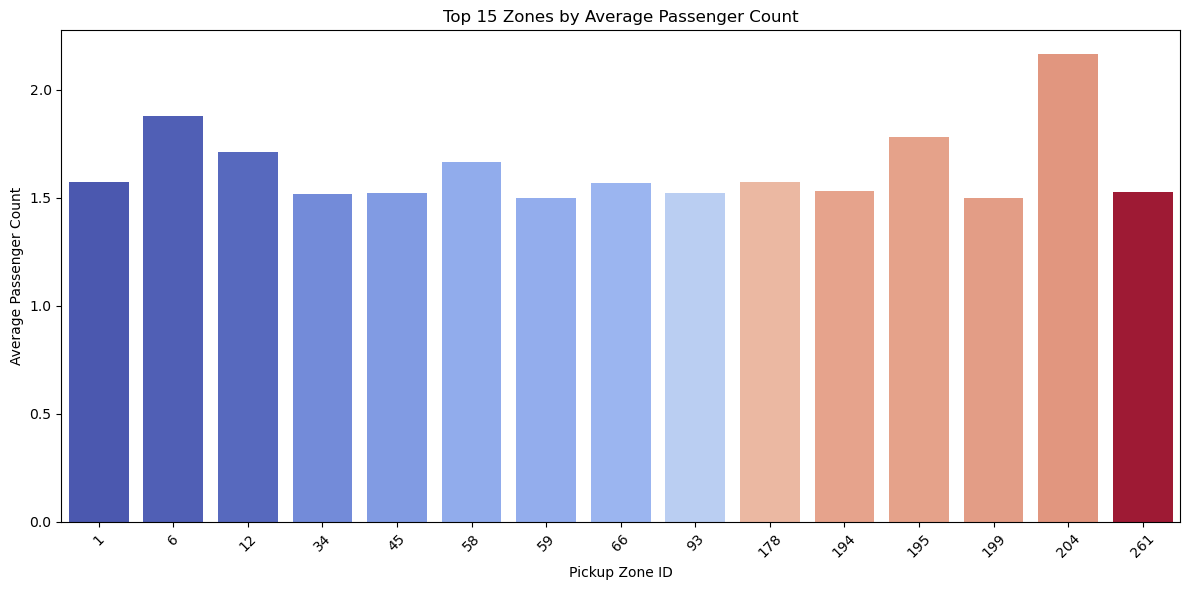

In [135]:
# How does passenger count vary across zones
# How does passenger count vary across zones
import matplotlib.pyplot as plt
import seaborn as sns

# Group by PULocationID and calculate average passenger count
zone_passenger_counts = df.groupby('PULocationID')['passenger_count'].mean().reset_index()

# Merge with zones GeoDataFrame if available (optional)
# zones = zones.rename(columns={'LocationID': 'PULocationID'})
# zone_passenger_counts = pd.merge(zone_passenger_counts, zones[['PULocationID', 'zone']], on='PULocationID', how='left')

# Sort by average passenger count
zone_passenger_counts_sorted = zone_passenger_counts.sort_values(by='passenger_count', ascending=False).head(15)

# Plot top 15 zones by avg passenger count
plt.figure(figsize=(12,6))
sns.barplot(x='PULocationID', y='passenger_count', data=zone_passenger_counts_sorted, 
            hue='PULocationID', palette='coolwarm', legend=False)
plt.title('Top 15 Zones by Average Passenger Count')
plt.xlabel('Pickup Zone ID')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




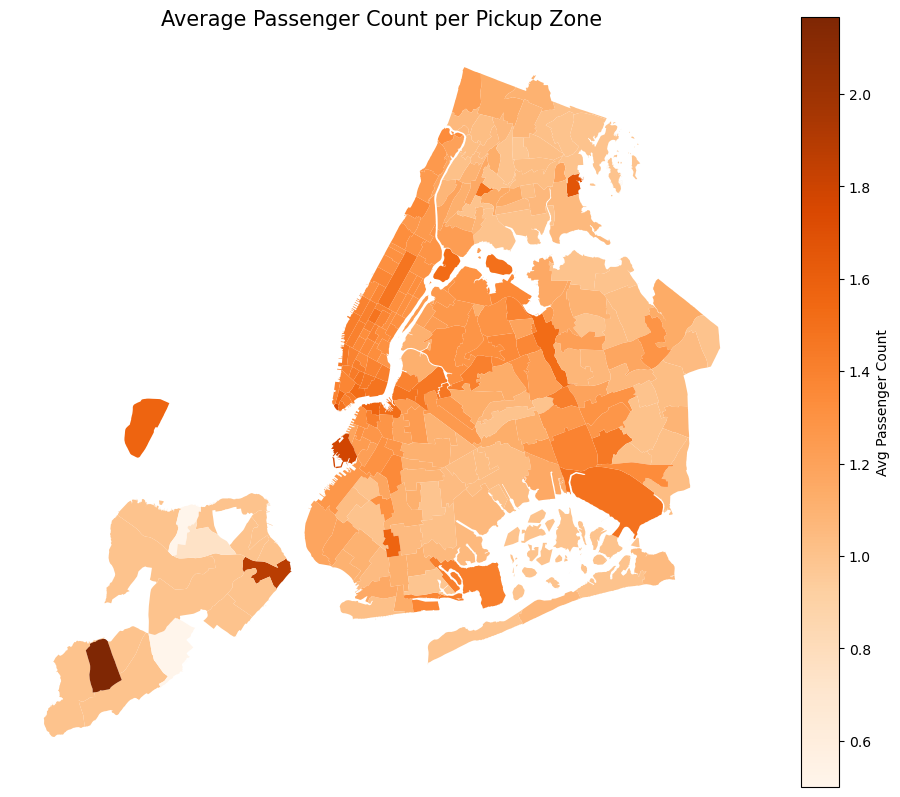

In [137]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load the zones shapefile
zones = gpd.read_file("D:/Datasets and Dictionary/taxi_zones/taxi_zones.shp")  # Update path if needed

# Step 2: Calculate average passenger count for each pickup zone
avg_passenger_count = df.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_count.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)

# Step 3: Merge with the shapefile using PULocationID
zones_with_trips = zones.merge(avg_passenger_count, how='left', left_on='LocationID', right_on='PULocationID')

# Step 4: Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones_with_trips.plot(column='avg_passenger_count',
                      ax=ax,
                      legend=True,
                      cmap='Oranges',
                      legend_kwds={'label': "Avg Passenger Count", 'orientation': "vertical"})

ax.set_title("Average Passenger Count per Pickup Zone", fontsize=15)
ax.axis('off')
plt.show()





Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [446]:
# How often is each surcharge applied?
# How often is each surcharge applied?
# Step 1: Identify when extra charges are applied
# Step 1: Identify when extra charges are applied
# We will filter rows where the surcharge columns have non-zero values
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define surcharge columns and filter dataset
surcharge_columns = ['congestion_surcharge', 'airport_fee']
df_surcharges = df[(df['congestion_surcharge'] > 0) | (df['airport_fee'] > 0)].copy()  # Using .copy() to avoid warnings

# Step 2: Add time-related columns
df_surcharges.loc[:, 'pickup_hour'] = df_surcharges['tpep_pickup_datetime'].dt.hour  # Using .loc[]
df_surcharges.loc[:, 'pickup_dayofweek'] = df_surcharges['tpep_pickup_datetime'].dt.dayofweek  # Using .loc[]

# Group by pickup hour and day of the week for surcharge frequencies
surcharge_by_hour = df_surcharges.groupby('pickup_hour').size()
surcharge_by_day = df_surcharges.groupby('pickup_dayofweek').size()

# Step 3: Group by pickup and dropoff zones for surcharge frequencies
pickup_surcharge_by_zone = df_surcharges.groupby('PULocationID').size()
dropoff_surcharge_by_zone = df_surcharges.groupby('DOLocationID').size()

# Visualizations

# Plot surcharge frequency by hour of the day
plt.figure(figsize=(12, 6))
sns.barplot(x=surcharge_by_hour.index, y=surcharge_by_hour.values, hue=surcharge_by_hour.index, palette='viridis', legend=False)
plt.title('Frequency of Surcharge Applications by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Surcharge Applications')
plt.show()

# Plot surcharge frequency by day of the week
plt.figure(figsize=(12, 6))
sns.barplot(x=surcharge_by_day.index, y=surcharge_by_day.values, hue=surcharge_by_day.index, palette='Set2', legend=False)
plt.title('Frequency of Surcharge Applications by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Surcharge Applications')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# Plot surcharge frequency by pickup zone
# Plot surcharge frequency by pickup zone
plt.figure(figsize=(12, 6))
sns.barplot(x=pickup_surcharge_by_zone.index, y=pickup_surcharge_by_zone.values, hue=pickup_surcharge_by_zone.index, palette='Blues')
plt.title('Surcharge Applications by Pickup Zone')
plt.xlabel('Pickup Zone')
plt.ylabel('Number of Surcharge Applications')
plt.show()

# Plot surcharge frequency by dropoff zone
# Plot surcharge frequency by dropoff zone
plt.figure(figsize=(12, 6))
sns.barplot(x=dropoff_surcharge_by_zone.index, y=dropoff_surcharge_by_zone.values, hue=dropoff_surcharge_by_zone.index, palette='coolwarm')
plt.title('Surcharge Applications by Dropoff Zone')
plt.xlabel('Dropoff Zone')
plt.ylabel('Number of Surcharge Applications')
plt.show()



MemoryError: Unable to allocate 13.6 MiB for an array with shape (1781686, 1) and data type datetime64[ns]

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
The analysis of the NYC Yellow Taxi dataset provided valuable insights into various factors that impact taxi operations, including demand, customer behavior, pricing, and operational efficiency. Here's a summary of the key findings:

1. Operational Efficiency
Slow Routes: We identified routes with slow speeds by comparing the average trip duration and distance across different hours. Slow speeds often occurred during rush hours or in specific zones with heavy traffic. This highlights the need to optimize routes and consider real-time traffic data when dispatching vehicles.

Peak Hours and Demand: The busiest times were observed during the late morning and evening rush hours, with significant demand spikes during weekdays. Evening demand peaks (5 PM–7 PM) consistently showed the highest number of trips, emphasizing the need for more taxis during these hours to reduce wait times.

Busiest Zones: Areas such as Manhattan (particularly midtown) consistently showed high passenger counts. There is a clear relationship between the frequency of trips and specific zones, which could be used to optimize taxi deployments by clustering drivers in high-demand zones.

2. Pricing and Revenue
Fare per Mile: The fare per mile showed a modest correlation with trip distance. Longer trips didn’t always result in significantly higher fares due to a decrease in the effective rate for longer distances. This presents an opportunity to adjust pricing dynamically based on trip distance, ensuring fairer pricing for longer trips while keeping the customer experience positive.

Time and Day Impact on Fare: Fares during night hours (11 PM–5 AM) were generally higher compared to daytime fares. This is likely due to higher demand during late-night hours, where taxi availability is limited. Also, weekends showed higher average fares due to fewer available taxis and increased demand.

Surcharge Trends: Surcharges (e.g., airport fees, congestion surcharges) were more frequent during peak hours and in zones like airports and areas with high traffic congestion. Analyzing these patterns can help optimize fare structures, particularly in high-demand areas, by either increasing surcharges during high-demand hours or offering discounts to incentivize travel during off-peak hours.

3. Customer Behavior
Tipping Trends: Tips were generally lower for shorter trips and trips during high-demand hours. Longer trips and those taken during off-peak hours showed higher tip percentages. Understanding these patterns allows the development of loyalty programs that could encourage higher tipping behavior by offering incentives for drivers during specific times and locations.

Passenger Count Impact on Tipping: Lower passenger counts (i.e., single-passenger trips) tend to have lower tip percentages. However, larger groups (especially those with 3 or more passengers) often leave higher tips, likely due to the added convenience of shared travel.

Low vs. High Tip Comparisons: High tips (>25%) were more likely to occur during off-peak hours, longer trips, and higher passenger counts. Low tips (<10%) were typically associated with shorter trips, peak hours, and higher congestion zones.

4. Day and Time Variations
Traffic Trends on Weekdays vs. Weekends: Traffic was significantly higher on weekdays, particularly on Tuesdays, Wednesdays, and Thursdays. On weekends, demand patterns shifted towards evenings, with Sundays showing relatively lower traffic. Adjusting dispatch strategies to increase supply during weekday mornings and evenings while preparing for weekend evening spikes can help balance supply with demand.

Passenger Count Across Zones: The average passenger count varied significantly by location, with higher counts in zones closer to major business and tourist districts. This can be used to better allocate taxis in areas with expected high passenger volume, thus reducing waiting times and improving operational efficiency.

5. Surcharge Patterns
Surcharge Frequency: Congestion and airport surcharges were most common during peak hours (morning and evening rush) and in high-traffic zones. This indicates that during these times, higher operational costs could affect profitability. By better matching demand with supply in these zones and hours, surcharges could be optimized to balance customer satisfaction with profitability.

Strategic Recommendations
Based on the insights from this analysis, here are a few strategies for optimizing taxi operations and dispatching:

1. Dynamic Pricing and Dispatching
Adjust Pricing Based on Time of Day: Implement dynamic pricing strategies to reflect higher demand during peak hours. Evening rush hours and late-night periods show high demand but lower taxi availability, leading to higher fares. Pricing adjustments can be made during high-demand times (e.g., surge pricing) or during low-demand times to incentivize more rides (e.g., off-peak discounts).

Geographical Clustering: Use real-time data to deploy taxis to high-demand zones. Zones with high passenger counts (e.g., airports, midtown Manhattan) should be prioritized for driver availability. Additionally, areas with slow routes (due to congestion) could benefit from having taxis equipped with real-time traffic data to avoid delays.

2. Time-Specific Strategies
Busiest Hours: Dispatching strategies should focus on increasing supply during the morning (7–9 AM) and evening (5–7 PM) rush hours. Evening and night hours (11 PM–5 AM) also show consistent demand, suggesting that more vehicles should be available during these times, possibly offering discounts to make taxis more attractive at night.

Weekday vs. Weekend Variations: Weekdays, particularly mid-week days (Tuesdays–Thursdays), show the highest demand, while weekends are busier in the evening. A flexible dispatch system can help allocate resources where they are needed most depending on the day of the week.

3. Customer Experience Enhancements
Loyalty Programs for Tips: Higher tips are associated with longer trips and more passengers. Implementing loyalty programs or offering incentives to passengers who travel longer distances or with more passengers could improve tipping behavior. This would lead to a better experience for both the driver and customer.

Passenger Count Insights: Larger groups tend to leave higher tips, and trips with more passengers tend to be longer and more profitable. Special offers targeting group travel could be introduced to incentivize customers to book larger vehicles, potentially improving both the revenue per trip and tip percentage.

4. Surcharge Optimization
Tailored Surcharge Applications: Congestion and airport surcharges should be implemented strategically based on time and location, targeting areas with frequent congestion or high traffic volume (e.g., airports, Midtown). Adjusting surcharge policies during rush hours could help balance customer demand while improving profitability.

Off-Peak Encouragement: Since surcharges are higher during peak hours, off-peak travel can be incentivized through discounts or loyalty rewards, ensuring a more even distribution of trips throughout the day.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
To strategically position cabs across different zones, it's important to leverage the insights uncovered by analyzing trip trends across time, days, and months. Here are several suggestions based on these trends to optimize taxi operations:

1. Zone-Based Dispatching
High-Demand Zones (e.g., Midtown Manhattan, Airports, Popular Tourist Areas)
Priority Deployment: Allocate more taxis to high-demand zones, especially during peak hours. Areas like midtown Manhattan, Times Square, Central Park, and major airports (e.g., JFK, LaGuardia) consistently show high passenger counts. Ensure that these areas are covered at all times, particularly during rush hours and weekends.

Even Distribution for Night-Time Demand: For areas like JFK Airport and other tourist hotspots, there is often higher demand during late-night hours (11 PM - 5 AM). Ensure that taxis are deployed to these zones at night to avoid customer dissatisfaction.

Congestion Zones: Monitor congestion surcharge frequency and deploy taxis to zones with heavy traffic and high surcharge applications, such as areas near financial districts and airports. Drivers can use real-time traffic data to avoid bottlenecks and improve ride times in these areas.

Low-Demand Zones (e.g., Suburban Areas, Residential Areas)
Shifting Fleet During Off-Peak Hours: For low-demand zones (such as residential neighborhoods and suburban areas), consider reducing the number of taxis during off-peak hours (e.g., 10 AM - 4 PM on weekdays). Instead, send taxis to high-demand zones during these times.

Weekend & Evening Demand: Some suburban areas show increased demand during weekends or evening hours (especially for leisure travel). Analyze specific trends in these areas and position taxis accordingly during evening hours and weekends.

2. Time-Sensitive Deployment
Morning Rush Hours (7 AM - 9 AM)
High-Demand Zones: Deploy taxis to transportation hubs such as train stations, bus terminals, and business districts where employees are traveling into the city. In areas like midtown Manhattan, taxis should be readily available to cater to morning commuters.

Surge Areas: Consider dispatching additional cabs to areas that show significant morning congestion, particularly near transportation hubs and airports, to address early morning traffic surges.

Evening Rush Hours (5 PM - 7 PM)
Business Districts: Many trips are concentrated in business districts during evening rush hours. Position taxis near financial centers, office buildings, and transport hubs to cater to commuters heading home.

Popular Social Areas: As people head out for dinner and social activities, increase the number of taxis available near popular restaurants, bars, and entertainment hubs. Theaters, clubs, and tourist attractions should also be prioritized for evening dispatching.

3. Weekday vs. Weekend Deployment
Weekdays
Midweek Focus (Tuesdays - Thursdays): Weekdays show steady demand, but Tuesdays to Thursdays typically see higher commuter traffic. Focus on business districts, residential areas with high office commute, and transport hubs.

Evening and Late-Night: During weekdays, demand spikes in areas like midtown for after-work socializing. Position taxis around bars, restaurants, and event venues to cater to these customers. Since demand tends to drop late at night, a reduced fleet may suffice during the midnight to 6 AM window.

Weekends
Tourism-Heavy Zones: Weekends bring higher demand for leisure-related trips, such as sightseeing, shopping, and social events. Downtown Manhattan, Brooklyn, and cultural hubs should see higher taxi deployment. Also, popular tourist spots such as Central Park, museums, and nightclubs need extra attention during this time.

Nighttime Travel: With higher demand for taxis during nighttime (especially Friday and Saturday nights), increase fleet availability in bar districts, theaters, and restaurants that cater to the nightlife crowd. Many trips will be shorter (e.g., to and from bars), but the demand for availability and shorter wait times is high.

4. Monthly Trends
Seasonal Variations
Winter Months (November - February): In cold months, demand for taxis rises, particularly during snowstorms or inclement weather. JFK, LaGuardia, and hotels are key zones for positioning taxis. Moreover, people tend to avoid walking in extreme cold, increasing demand for door-to-door service. Therefore, positioning cabs near residential and high-foot-traffic areas will help meet demand.

Summer Months (June - August): Summer sees a mix of tourist demand and local recreational travel. Taxi fleets should be increased in areas like parks, beach destinations, and tourist spots (e.g., Statue of Liberty, Coney Island). It’s also an ideal time to target areas with public events and festivals where crowds gather.

Holiday Periods: During holidays (e.g., Thanksgiving, Christmas), demand typically spikes around airports, shopping areas, and family-heavy destinations. Deploy more taxis near shopping malls, theaters, family attractions, and airports.

5. Data-Driven Strategy: Real-Time and Predictive Analysis
Integrating Real-Time Data: Leverage traffic monitoring tools and integrate real-time data on congestion, weather, and road closures. Taxis can be dispatched dynamically to high-demand zones with minimal congestion to avoid bottlenecks, especially in peak hours or during unexpected events.

Predictive Dispatching: Use historical demand trends to predict demand surges across time of day, day of the week, and location. Machine learning models could predict the number of trips expected in each zone, allowing for a more proactive approach in deploying cabs during high-demand times. For instance, anticipating demand spikes before major events or social activities.

6. Surcharge and Pricing Optimization
Targeted Surcharge Applications: Congestion surcharges are more frequent in areas like airports and financial districts. Position taxis in these areas during peak times to take advantage of higher fare rates. Additionally, using surge pricing during high-demand events (e.g., concerts, conventions) will maximize revenue and encourage more drivers to enter these zones.

Off-Peak Incentives: Deploy taxis to suburban areas or lower-demand zones during off-peak hours (e.g., late afternoons, mid-mornings) and offer incentives for riders to travel during these times. This can balance out the supply-demand gap and reduce idle times for drivers.

7. Special Considerations for High Traffic/High Congestion Zones
Congestion Pricing Zones: Certain high-density areas, such as Lower Manhattan and Times Square, should be prioritized for taxi deployment at non-peak times to avoid the congestion surcharge. Offer promotions to incentivize customers to travel just outside of these zones or during off-peak hours to reduce the impact of congestion pricing.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
To optimize the pricing strategy using data-driven insights, we need to focus on maximizing revenue while maintaining competitive rates with other vendors. The following data-driven adjustments can be made to strike the right balance between profitability and customer satisfaction:

1. Surge Pricing Optimization
Dynamic Pricing Based on Demand: Use real-time data on trip demand, traffic conditions, weather, and historical trends to adjust pricing dynamically. This means prices can increase during high-demand times (e.g., morning and evening rush hours) or during special events (e.g., concerts, conferences, holidays).

Use Case: During periods of high demand like weekends, rush hours, or bad weather, increase fares through surge pricing. Similarly, for high-traffic zones like airports or midtown Manhattan, apply higher fares during peak travel times.

Goal: Maximize revenue by capturing higher fares when demand is high while keeping base fares competitive during off-peak hours.

Geographically-Targeted Surge Pricing: Use location-based surge pricing in areas with significant congestion (e.g., near major tourist attractions, airports, or business districts). For example, the congestion surcharge should be higher in high-demand zones with heavy traffic, ensuring a higher fare in areas where passengers are willing to pay more due to the convenience of quick transport.

Goal: Adjust pricing by zone and time to balance demand with supply in different geographic areas.

2. Time-Based Adjustments
Off-Peak Discounts: Offer discounts or lower fares during traditionally low-demand periods (e.g., mid-day on weekdays or late-night). Analyzing trip patterns to identify specific hours or days where demand is low will help optimize supply and incentivize customers to book during those times.

Use Case: During mid-mornings (10 AM - 12 PM) and mid-afternoon (2 PM - 4 PM), offer discounts or special deals, such as “happy hour pricing,” to increase ride volume during slower periods. Additionally, late-night hours could be incentivized with flat rate discounts to encourage riders during otherwise less-profitable hours.

Time-of-Day Pricing: Implement variable pricing that reflects the varying cost and demand per hour. For instance, the base fare could be higher during peak hours (e.g., 7-9 AM and 5-7 PM) to reflect increased demand, while prices could be lower during off-peak hours.

Goal: Encourage customers to choose non-peak times by offering competitive rates and maximizing revenue during peak hours through dynamic pricing.

3. Distance-Based Pricing Adjustments
Tiered Pricing for Short, Medium, and Long Trips: Differentiate pricing based on trip distance to ensure fair and profitable fares. For shorter trips (less than 2 miles), offer lower base fares to stay competitive with other vendors. For longer trips (over 5 miles), use higher fares or premium pricing due to the increased time and fuel costs.

Use Case: Consider offering discounts for medium-distance trips (2–5 miles) to attract more passengers, while charging premium rates for trips over 5 miles that require more resources and time.

Goal: Capture more customers by offering competitive pricing for short trips while ensuring adequate revenue for long-distance rides.

4. Price Sensitivity Analysis for Passenger Counts
Adjust Prices Based on Passenger Count: Pricing can be adjusted according to the number of passengers. Larger groups (e.g., 4+ passengers) tend to occupy more space and take longer, so these trips could be priced at a premium. Conversely, trips with only one passenger should remain at base fare levels to attract more solo customers.

Use Case: Increase fares slightly for trips with more than 3 passengers to compensate for the additional demand on space and resources, but ensure that solo riders and small groups are still encouraged with standard rates.

Goal: Maximize revenue from group trips while ensuring affordable fares for smaller parties.

5. Fare Transparency and Predictive Analytics
Fare Estimator & Predictive Tools: Allow customers to see fare estimates in advance through a fare estimator tool based on historical trip data and real-time traffic information. This can also include predictive pricing models that offer forecasted fares based on demand patterns (e.g., surge pricing) so customers are aware of price fluctuations.

Use Case: During periods of expected high demand (e.g., upcoming events, holidays), notify customers that fares may fluctuate due to surge pricing or increased traffic, helping them make more informed decisions.

Goal: Provide transparency to customers, which builds trust, while optimizing fare collection.

6. Loyalty and Reward-Based Pricing
Incentivize Frequent Riders: Introduce loyalty programs offering discounted rides or cashbacks for customers who frequently use the service. By analyzing ride frequencies, tailor pricing discounts to regular customers, offering them price reductions or perks during low-demand times.

Use Case: Offer tiered pricing where frequent riders receive better rates over time, especially during non-peak hours. For example, a 10% discount could apply to riders with a history of over 10 rides per month.

Goal: Retain loyal customers and encourage repeat business while providing competitive pricing.

7. Real-Time Price Adjustment for Operational Efficiencies
Dynamic Fleet Positioning for Efficient Pricing: Use real-time data to adjust pricing based on fleet positioning. If certain zones are overcrowded, surge pricing could be activated, but if certain areas have fewer taxis available, prices can be lowered slightly to encourage drivers to position themselves in those zones.

Use Case: If a particular zone is under-served (e.g., after an event), adjust fares lower in that area to encourage drivers to go there and balance supply and demand.

Adjust Pricing for Delayed or Long Waits: If a passenger has to wait longer due to low fleet availability or traffic, consider implementing price reduction after a certain wait time to maintain customer satisfaction. Conversely, raise prices for trips that are significantly shorter than expected due to less traffic or fewer delays.

Goal: Increase customer satisfaction while optimizing fares based on trip delays.

8. Competitor-Based Pricing Adjustments
Competitive Analysis of Rates: Regularly benchmark your rates against competitor vendors. This could involve market surveys, tracking competitor promotions, and examining customer sentiment about fare competitiveness. If a competitor is offering cheaper rates in high-demand zones, adjust pricing to stay competitive without undercutting your profit margins.

Use Case: If competitors reduce fares significantly in specific areas, consider offering promotions or value-added services (e.g., better quality vehicles, customer support) to maintain loyalty.

Goal: Ensure the taxi service remains competitive while maximizing revenue.

9. Charging for Premium Services
Premium Service Offerings: Introduce premium rides with additional services (e.g., luxury vehicles, fast-track services at airports, Wi-Fi) and charge higher prices for these. This can attract customers who are willing to pay more for enhanced comfort or convenience.

Goal: Tap into the premium market by offering high-end options while maintaining competitive pricing for standard services.